## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from scipy import stats as stats
import folium
import re
import os
from IPython.display import Image
%matplotlib inline

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import data
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [4]:
#inspect data
display(df.head())
df.describe()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** -  Price is prediction target
* **bedrooms** -  Number of Bedrooms/House
* **bathrooms** -  Number of bathrooms of bathrooms/bedrooms
* **sqft_living** -  square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#rename column for clarity
df.rename(columns=({'date': 'date_sold'}), inplace=True)
df.head()

id   date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

# SCRUB

In [7]:
#Keeping these as unique instances
#After investigation were determined
#To be houses sold twice on
#two seperate dates

df.id.duplicated().sum()

177

In [8]:
#check dataframe for null values
df.isna().sum()

id                  0
date_sold           0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### DateTime

Date sold was converted to a datetime datatype below and two new features were created to analyize price in terms of years and months.

In [9]:
df['date_sold'] = pd.to_datetime(df['date_sold'])
df['year_sold'] = df.date_sold.dt.year
df['month_sold'] = df.date_sold.dt.month
df.head()

id  date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0         NaN   0.0  ...            0.0      1955   
1      7242     2.0         0.0   0.0  ...          400.0      1951   
2     10000     1.0         0.0   0.0  ...            0.0      1933   
3      5000     1.0         0.0   0.0  ...          910.0      1965   
4      8080     1.0         0.0   0.0  ...            0.0      1987   

   yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0   98178  47.5112 -122.257           1340        5650   
1        1991.0   98125  47.7210 -122.319           1690        7639   
2           NaN   98028  47.7379 -122.233           2720        8062   
3           0.0   98136  47.5208 -122.393           1360        5000   
4           0.0   98074  47.6168 -122.045           1800        7503   

   year_sold  month_sold  
0       2014          10  
1       2014          12  
2       2015           2  
3       2014          12  
4       2015           2  

[5 rows x 23 columns]

#### Year Renovated

There are a large number of null values in the yr_renovated column that must be addressed.

In [10]:
df.yr_renovated.value_counts(dropna=False, normalize=True)

0.0       0.787656
NaN       0.177895
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
            ...   
1944.0    0.000046
1948.0    0.000046
1976.0    0.000046
1934.0    0.000046
1953.0    0.000046
Name: yr_renovated, Length: 71, dtype: float64

In [11]:
#fill all null values with zero
df.yr_renovated.fillna(0, inplace=True)

In [12]:
#sanity check
df.yr_renovated.isna().sum()

0

In [13]:
df.columns

Index(['id', 'date_sold', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold',
       'month_sold'],
      dtype='object')

#### Age of Houses

After exploring different options for processing variables related to time in a way to fit my model in a meaningful way, I decided to create two new booleans for whether the house is newly constructed and another boolean for whether or not the house was constructed before World War II. In terms of the age of a house, these seem to be the most interesting factors to consider as well as any recent renovations. 

In [14]:
#feature creation
df['age_at_sale'] = df.year_sold - df.yr_built


# #initiate new series in order to
# #construct boolean describing
# # #whether or not the home is newly constructed
# df['newly_constructed'] = df[df['age_at_sale'] <= 2].age_at_sale

# # #construct boolean
# df['newly_constructed'] = df['newly_constructed'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)
# df.newly_constructed.fillna(0, inplace=True)


# #initiate series in order to
# #construct boolean describing
# #if the house was constructed before
# #the end of WWII
# df['old_home'] = df.loc[df.age_at_sale >= 50].age_at_sale

# # #construct boolean
# df['old_home'] = df['old_home'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)
# df.old_home.fillna(0, inplace=True)



#create new boolean feature
#that describes whether
#a property was renovated within
#a decade before being sold

df['recently_renovated'] = 0
row_to_update2 = df[df.year_sold - df.yr_renovated <=10].index
column_to_update2 = ['recently_renovated']
df.loc[row_to_update2, column_to_update2] = 1

#### Basement

In [15]:
#inspect column
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
906.0         1
2580.0        1
2720.0        1
704.0         1
2490.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [16]:
#replace ? with 0 and convert to float datatype

df['sqft_basement'] = df['sqft_basement'].map(lambda x: x.replace("?", "0"))
df['sqft_basement'] = df['sqft_basement'].apply(pd.to_numeric)

In [17]:
#sanity check
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [18]:
df[df.sqft_basement > 0]

id  date_sold      price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09   538000.0         3       2.25         2570   
3      2487200875 2014-12-09   604000.0         4       3.00         1960   
5      7237550310 2014-05-12  1230000.0         4       4.50         5420   
8      2414600126 2015-04-15   229500.0         3       1.00         1780   
10     1736800520 2015-04-03   662500.0         3       2.50         3560   
...           ...        ...        ...       ...        ...          ...   
21572  2767600688 2014-11-13   414500.0         2       1.50         1210   
21574  7430200100 2014-05-14  1220000.0         4       3.50         4910   
21579  1972201967 2014-10-31   520000.0         2       2.25         1530   
21590  7936000429 2015-03-26  1010000.0         4       3.50         3510   
21591  2997800021 2015-02-19   475000.0         3       2.50         1310   

       sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode  \
1          7242     2.0         0.0   0.0  ...        1991.0    98125   
3          5000     1.0         0.0   0.0  ...           0.0    98136   
5        101930     1.0         0.0   0.0  ...           0.0    98053   
8          7470     1.0         0.0   0.0  ...           0.0    98146   
10         9796     1.0         NaN   0.0  ...           0.0    98007   
...         ...     ...         ...   ...  ...           ...      ...   
21572      1278     2.0         0.0   0.0  ...           0.0    98117   
21574      9444     1.5         0.0   0.0  ...           0.0    98074   
21579       981     3.0         0.0   0.0  ...           0.0    98103   
21590      7200     2.0         0.0   0.0  ...           0.0    98136   
21591      1294     2.0         0.0   0.0  ...           0.0    98116   

           lat     long  sqft_living15  sqft_lot15  year_sold  month_sold  \
1      47.7210 -122.319           1690        7639       2014          12   
3      47.5208 -122.393           1360        5000       2014          12   
5      47.6561 -122.005           4760      101930       2014           5   
8      47.5123 -122.337           1780        8113       2015           4   
10     47.6007 -122.145           2210        8925       2015           4   
...        ...      ...            ...         ...        ...         ...   
21572  47.6756 -122.375           1210        1118       2014          11   
21574  47.6502 -122.066           4560       11063       2014           5   
21579  47.6533 -122.346           1530        1282       2014          10   
21590  47.5537 -122.398           2050        6200       2015           3   
21591  47.5773 -122.409           1330        1265       2015           2   

       age_at_sale  recently_renovated  
1               63                   0  
3               49                   0  
5               13                   0  
8               55                   0  
10              50                   0  
...            ...                 ...  
21572            7                   0  
21574            7                   0  
21579            8                   0  
21590            6                   0  
21591            7                   0  

[8317 rows x 25 columns]

In [19]:
#create new boolean feature
#that describes whether
#a property has a basement

df['has_basement'] = 0
row_to_update3 = df[df.sqft_basement > 0].index
column_to_update3 = ['has_basement']
df.loc[row_to_update3, column_to_update3] = 1
df.has_basement.value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

The tail ends of some suspect variables were investigated. Below are the steps I implemented in order to determine if the house with 33 bedrooms and a living space of 1620 sqft was an outlier or a typo. 

I first calculated the median of the living area for each bedroom of the dataset. I then multiplied that value by 3 and 33 under the assumption that perhaps the 3 key was hit twice upon data entry.

After comparing the two values, it seems very reasonable to change the 33 bedroom house to a 3 bedroom house.

In [20]:
df.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [21]:
df.sort_values(['bedrooms'], ascending=False)

id  date_sold      price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25   640000.0        33       1.75         1620   
8748   1773100755 2014-08-21   520000.0        11       3.00         3000   
13301   627300145 2014-08-14  1150000.0        10       5.25         4590   
19239  8812401450 2014-12-29   660000.0        10       3.00         2920   
15147  5566100170 2014-10-29   650000.0        10       2.00         3610   
...           ...        ...        ...       ...        ...          ...   
12472  1172000150 2014-08-29   238000.0         1       1.00          530   
13316  4356200120 2014-10-23   248000.0         1       1.00          790   
7010    203100460 2014-09-24   400000.0         1       1.00          530   
3578   1925069006 2014-12-03   355000.0         1       0.75          530   
14373  7518503065 2014-06-23   335000.0         1       1.00          720   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
15856      6000     1.0         0.0   0.0  ...    98103  47.6878 -122.331   
8748       4960     2.0         0.0   0.0  ...    98106  47.5560 -122.363   
13301     10920     1.0         0.0   2.0  ...    98004  47.5861 -122.113   
19239      3745     2.0         0.0   0.0  ...    98105  47.6635 -122.320   
15147     11914     2.0         0.0   0.0  ...    98006  47.5705 -122.175   
...         ...     ...         ...   ...  ...      ...      ...      ...   
12472      6350     1.0         0.0   0.0  ...    98103  47.6946 -122.357   
13316     12000     1.0         0.0   0.0  ...    98118  47.5146 -122.265   
7010      13679     1.0         0.0   0.0  ...    98053  47.6422 -121.954   
3578      33278     1.0         0.0   2.0  ...    98074  47.6412 -122.079   
14373      5100     1.0         0.0   0.0  ...    98117  47.6821 -122.380   

       sqft_living15  sqft_lot15  year_sold  month_sold  age_at_sale  \
15856           1330        4700       2014           6           67   
8748            1420        4960       2014           8           96   
13301           2730       10400       2014           8            6   
19239           1810        3745       2014          12          101   
15147           2040       11914       2014          10           56   
...              ...         ...        ...         ...          ...   
12472           1200        6350       2014           8           73   
13316           1900        6000       2014          10           96   
7010            1930       20624       2014           9           65   
3578            2830       14311       2014          12           64   
14373           1320        5100       2014           6          107   

       recently_renovated  has_basement  
15856                   0             1  
8748                    0             1  
13301                   0             1  
19239                   0             1  
15147                   0             1  
...                   ...           ...  
12472                   0             0  
13316                   0             0  
7010                    0             0  
3578                    0             0  
14373                   0             0  

[21597 rows x 26 columns]

In [22]:
#calculate the living space of eac bedroom in the dataset
df['living_per_bed'] = df.sqft_living/df.bedrooms

In [23]:
#compare these two values to 
#the given sqft_area of the 33 bedroom house
print(df.living_per_bed.median() * 33)
print(df.living_per_bed.median() * 3)

19030.0
1730.0


In [24]:
#update the bedroom value to 3 at 
#target position
df.iat[15856, 3] = 3

In [25]:
df.iloc[15856]

id                             2402100895
date_sold             2014-06-25 00:00:00
price                              640000
bedrooms                                3
bathrooms                            1.75
sqft_living                          1620
sqft_lot                             6000
floors                                  1
waterfront                              0
view                                    0
condition                               5
grade                                   7
sqft_above                           1040
sqft_basement                         580
yr_built                             1947
yr_renovated                            0
zipcode                             98103
lat                               47.6878
long                             -122.331
sqft_living15                        1330
sqft_lot15                           4700
year_sold                            2014
month_sold                              6
age_at_sale                       

#### View

In [26]:
df.view.value_counts(dropna=False, normalize=True)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
NaN    0.002917
Name: view, dtype: float64

In [27]:
#Decdied to drop view column as I am not interested
#in including it in my model

df.drop(columns='view', inplace=True)

### Area

In [28]:
#create dataframe to explore 
#relationship between all variables
#that describe property area

df_area = df[['sqft_living', 'sqft_lot',
              'sqft_above', 'sqft_living15',
             'sqft_lot15']].copy()

df_area.corr()

sqft_living  sqft_lot  sqft_above  sqft_living15  sqft_lot15
sqft_living       1.000000  0.173453    0.876448       0.756402    0.184342
sqft_lot          0.173453  1.000000    0.184139       0.144763    0.718204
sqft_above        0.876448  0.184139    1.000000       0.731767    0.195077
sqft_living15     0.756402  0.144763    0.731767       1.000000    0.183515
sqft_lot15        0.184342  0.718204    0.195077       0.183515    1.000000

In [29]:
#Drop columns that not interested in or are
#out of scope for the project. 
#The area of the living area and lot area
#seem sufficient for the model

df.drop(columns=['sqft_above', 'sqft_living15',
             'sqft_lot15'], inplace=True)

Below I used folium to create an interactive map to visualize the rows of data I have in which there are null values for the waterfront column. The majority of the null values seem to be properties that would not be considered waterfront properties. Null values for the initial waterfront column will be replaced with zeroes.

In [30]:
#inspect value counts for waterfront properties

df.waterfront.value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [31]:
#create two seperate dataframes
#in order to create geographical visualization 
#of null values for waterfront vs
#waterfront property == 1 == true

df_water_null = df[df.waterfront.isna()]
df_water_one = df[df.waterfront == 1]
print(len(df_water_null))
print(len(df_water_one))

2376
146


In [32]:
#Create a map of the area
base_map = folium.Map([47.6, -122.33], zoom_start=10)
base_map

#create list of values for lat and long of
#waterfront properties
x1 = df_water_one.lat.values
y1 = df_water_one.long.values
waterfront_points = list(zip(x1, y1))

#add the waterfront properties as
#red circles to the base_map

for p in waterfront_points:
    lat = p[0]
    long = p[1]
    marker = folium.CircleMarker(location=[lat, long], radius=3, color='blue')
    marker.add_to(base_map)
base_map


#create a list of lat and long values for 
#data where waterfront values are null

x2 = df_water_null.lat.values
y2 = df_water_null.long.values
null_water_points = list(zip(x2, y2))

#add red circle markers to map
#to show null values of
#waterfront column

for p in null_water_points:
    lat = p[0]
    long = p[1]
    marker = folium.CircleMarker(location=[lat, long], radius=3, color='red')
    marker.add_to(base_map)
#display map   
base_map

### New Shoreline data using QGIS

In [33]:
#export latitude and longitude coordinates in order to
#to perform additional analysis using
#GIS software (QGIS).

geo_data = df[['lat', 'long']].copy()
geo_data.to_csv('data/latlong.csv')

During the initial exploration of the dataset, I ran across a very interesting blog that someone linked in the discussion section of kaggle.com in which the housing dataset was derived for this project. Author Juico Bowley gave an amazing step by step guide on how to use free GIS software in order to easily maniupulate geodata. Here is the link to the blog: https://towardsdatascience.com/data-visualization-with-python-folium-maps-a74231de9ef7

Although I am already familiar with GIS software as part of my undergraduate studies for Anthropology/Archaeology, it was really neat to see it applied in a different way and with easy to follow instructions. It has been a while since I have got to use any mapping software as the university had us use propitiery software. Thank you Juico Bowley for reintroducing the joy of maps back into my life!

I likely used a different shape file for the water and my cleaning process diverged from the original Author of the blog, my methods were essentially the same to derive the below image. The shapefile for the water used to create the shoreline data points was downloaded from the USGS database. This is a very popular source for mapping data. 

---------------------------------------------------------------------------------------------------------------
A quick run down of the process covered in the blog:

1) Export coordinates for all listings in dataset to CSV file in order to import into QGIS workstation.

2) Add streetmap layer of area using the browser built into the QGIS sofwtare.

3) Import CSV file of geodata for all listings (latlong) as a new layer (points).

4) Drag and drop shapefile downloaded from USGS database to add as another new polygon layer for all bodies of water for the given area. 

5) Convert water polygons into points in order to create distance vectors

6) Create the distance vectors to compute distance from each property listing to the closest point of water. 

7) Join the distance vectors layer to the latlong layer and export to CSV file.

8) Import CSV file back into a new pandas DataFrame for further manipulation.

---------------------------------------------------------------------------------------------------------------

The below image is a plot of every property in the dataset. The lighter dots are the properties. The darker dots are the shapefile of the water converted to datapoints at the shorelines in order to use QGIS vector analysis capabilities to explore the data even further. This analysis inabled me to derive a new set of waterfront properties from the given set of properties based on distance to the established shorelines. I used 0.1 miles as a cutoff for shoreline properties.

I did some of my own exploration and through some expirementation I found a method I will describe in detail below on how I added an extra column to my dataset for the school district of each listing.  

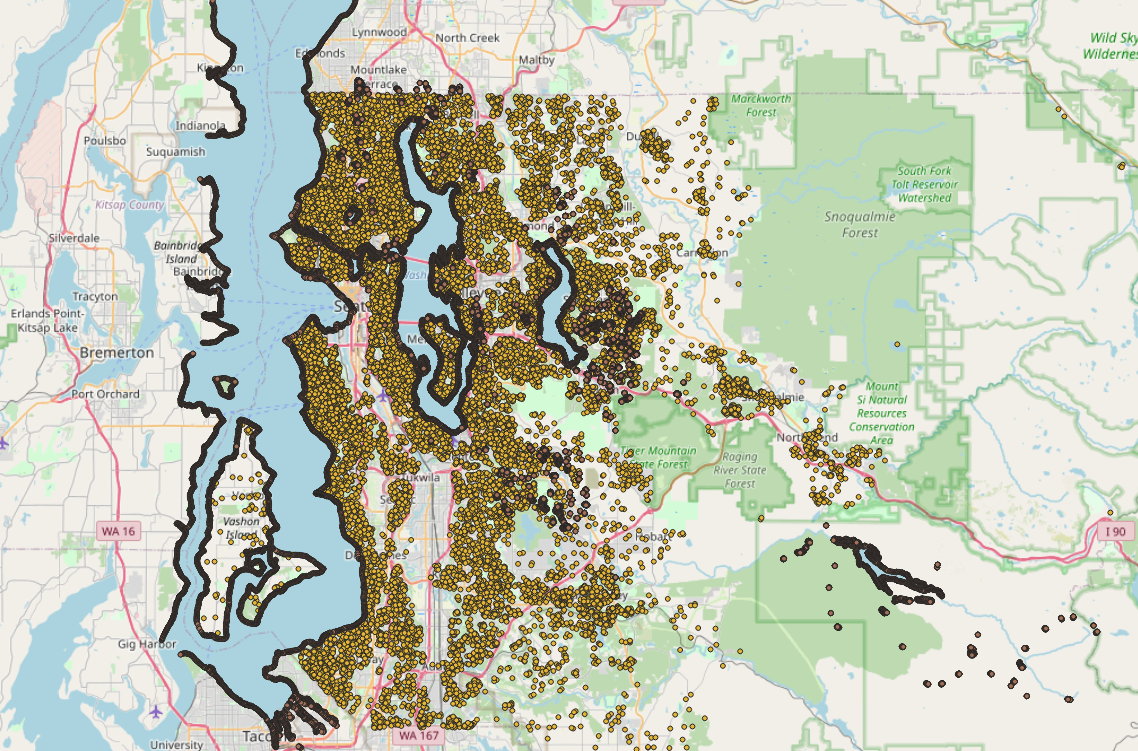

In [34]:
Image(filename='images/seattle_map_shore.png') 

This image shows the vectors used in order to calculate nearest distance to shore. 

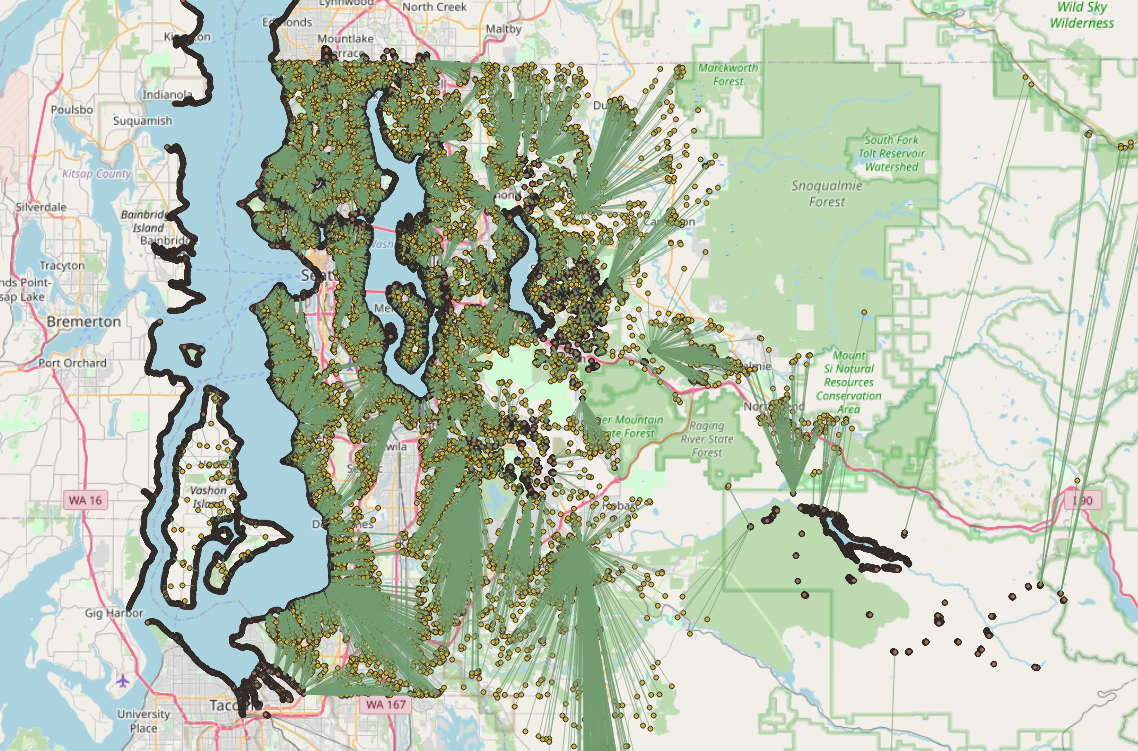

In [35]:
Image(filename='images/distance_to_shore.png') 

In [36]:
#import shoreline distance data collected from
#QGIS vector analysis
df_shores = pd.read_csv('data/shoreline_good.csv')

In [37]:
df_shores = df.join(df_shores, how='left', rsuffix="other")
df_shores.rename(columns={"Hub distance_HubDist": "shoreline_distance"}, inplace=True)
df_shores.head()

id  date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  condition  ...  year_sold  month_sold  \
0      5650     1.0         NaN          3  ...       2014          10   
1      7242     2.0         0.0          3  ...       2014          12   
2     10000     1.0         0.0          3  ...       2015           2   
3      5000     1.0         0.0          5  ...       2014          12   
4      8080     1.0         0.0          3  ...       2015           2   

   age_at_sale  recently_renovated  has_basement  living_per_bed  field_1  \
0           59                   0             0      393.333333        0   
1           63                   0             1      856.666667        1   
2           82                   0             0      385.000000        2   
3           49                   0             1      490.000000        3   
4           28                   0             0      560.000000        4   

   latother  longother  shoreline_distance  
0   47.5112   -122.257            0.372917  
1   47.7210   -122.319            0.328945  
2   47.7379   -122.233            0.678380  
3   47.5208   -122.393            0.070517  
4   47.6168   -122.045            0.985156  

[5 rows x 27 columns]

In [38]:
#drop redundant columns
df_shores.drop(columns=['latother', 'longother'], inplace=True)

In [39]:
#gather coordinates for new shoreline houses

lat_shores = df_shores[df_shores.shoreline_distance < 0.2].lat.copy()
long_shores = df_shores[df_shores.shoreline_distance < 0.2].long.copy()
shores = list(zip(lat_shores, long_shores))

#Nearly 2500 new 'waterfront' non-null values vs old set of ~ 150
len(shores)

2420

In [40]:
#Create a map to display new 'waterfront' properties

newshore_map = folium.Map([47.6, -122.33], zoom_start=10)
for p in shores:
    lat = p[0]
    long = p[1]
    marker = folium.CircleMarker(location=[lat, long], radius=3, color='blue')
    marker.add_to(newshore_map)
newshore_map

In [41]:
#create new series for newly derived waterfront properties

new_waterfront = df_shores[df_shores.shoreline_distance < 0.20].waterfront.copy()
new_waterfront.rename('new_waterfront', inplace=True)
new_waterfront.replace(to_replace=0, value=1, inplace=True)
new_waterfront.value_counts()

1.0    2164
Name: new_waterfront, dtype: int64

In [42]:
df = df_shores.join(new_waterfront)

In [43]:
df.new_waterfront.fillna(0, inplace=True)

### New School District Data using QGIS

### Step By Step QGIS Guide for school district data

![Map of districts and listings](images/pretty_districts_map.png)

The map above was created using some convenient QGIS built in tools. The first step was finding a useful shapefile to import into my QGIS project from before. There is alot of open source geodata available for the King County area available at kingcounty.gov. I have a included a link with full details for all of the metadata of the shapefile I ended up using for my school district polygon. 

**[Metadata for School District Shapefile](https://www5.kingcounty.gov/sdc/Metadata.aspx?Layer=schdst)**


Now that I have a shapefile for school districts and a properly oriented map of the area with all listings added to the map based on their coordinates (steps 1-3 above) I can import another polygone layer (step 4 above).

However, this time I do not need to do any conversions. The points I added for each property listing are all contained within the polygons I added for the school districts. All geospacial data for the properties intersects geospatial data for the polygons. Therefore, I can just add whatever property I want from the polygon layer and add it to the latlong points layer (in this case NAME, the name of the school district). After the district name was calculated for all points in the dataset, I exported it as a CVS and imported to my notebook as a pandas dataFrame.


<p style="font-size:2em;">toolbox > add polygon attributes to points.</p>

![QGIS tool to use](images/add_polygon_attributes.png)


<p style="font-size:2em;">choose points layer and polygon layer. Select what attributes <br><br> from the polygon layer you want to add to each point.<br><br> Here name was chosen in order to easily <br><br> manipulate as a series of my pandas dataFrame after exporting as a CVS file.</p> 

![popup_tool](images/districts_popup.png)


<p style="font-size:2em;">The result of runing this tool will be a layer with all of the data you want to export.</p>

![new layer formed](images/district_result.png)

<p style="font-size:2em;">Export the data.</p>

![export the data](images/export_csv.png)


## Manipulating School District Information

In [44]:
#import data from QGIS
districts_df = pd.read_csv('data/districts_two.csv')

In [45]:
#The only field of interest on this table is NAME. field_1
#was created upon export of the data from QGIS
#but is equivalent to the index of the original dataframe.
#distance_t was a leftover property from some other
#experimenting I was doing with the software.

display(districts_df.info())
districts_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   field_1     21597 non-null  int64  
 1   lat         21597 non-null  float64
 2   long        21597 non-null  float64
 3   distance_t  21597 non-null  float64
 4   NAME        21587 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 843.8+ KB


None

field_1      lat     long  distance_t             NAME
0        0  47.5112 -122.257    0.131046          Seattle
1        1  47.7210 -122.319    0.246588          Seattle
2        2  47.7379 -122.233    0.111950       Northshore
3        3  47.5208 -122.393    1.052796          Seattle
4        4  47.6168 -122.045    0.715115  Lake Washington

In [46]:
#Create Series for School District Names
districts = districts_df.NAME

#There are ten null values that need to be addressed.
districts.isna().sum()

10

In [47]:
#Join district series to original dataframe to create new dataframe.
#This will be used to determine what school district names to fill in 
#By cimparing to values in the zipcode column.

df_districts = df.join(districts).copy()

#create array to get the values of the zipcode for each index where
#the value of NAME is null
districts_array = df_districts[df_districts.NAME.isna()].zipcode.values

#update dataframe to only include data from these zipcodes
districts_df = df_districts[df_districts.zipcode.isin(districts_array)]

districts_df.NAME.value_counts()

Lake Washington      946
Federal Way          568
Issaquah             337
Mercer Island        281
Bellevue             277
Highline             208
Vashon Island        116
Northshore            29
Snoqualmie Valley     25
Name: NAME, dtype: int64

In [48]:
#sort dataframe by ascending zipcode
zip_district_names = districts_df.sort_values(by=['zipcode'])
zip_district_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2797 entries, 10157 to 7
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2797 non-null   int64         
 1   date_sold           2797 non-null   datetime64[ns]
 2   price               2797 non-null   float64       
 3   bedrooms            2797 non-null   int64         
 4   bathrooms           2797 non-null   float64       
 5   sqft_living         2797 non-null   int64         
 6   sqft_lot            2797 non-null   int64         
 7   floors              2797 non-null   float64       
 8   waterfront          2484 non-null   float64       
 9   condition           2797 non-null   int64         
 10  grade               2797 non-null   int64         
 11  sqft_basement       2797 non-null   float64       
 12  yr_built            2797 non-null   int64         
 13  yr_renovated        2797 non-null   float64    

In [49]:
#display percentage of school district values 
#for each zipcode of interest

for ZIP in zip_district_names.zipcode.unique():
    print(ZIP)
    display(zip_district_names[zip_district_names['zipcode'] == ZIP].NAME.value_counts(normalize=True))
    print('-----------------------------------------------------------------------')

98008


Bellevue    0.98227
Issaquah    0.01773
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98023


Federal Way    1.0
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98033


Lake Washington    1.0
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98034


Lake Washington    0.946691
Northshore         0.053309
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98040


Mercer Island    1.0
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98070


Vashon Island    1.0
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98075


Issaquah             0.929972
Snoqualmie Valley    0.070028
Name: NAME, dtype: float64

-----------------------------------------------------------------------
98198


Highline       0.748201
Federal Way    0.251799
Name: NAME, dtype: float64

-----------------------------------------------------------------------


In [50]:
#check values
df_districts[df_districts.NAME.isna()].sort_values(by='zipcode').zipcode.values

array([98008, 98023, 98033, 98034, 98040, 98070, 98075, 98075, 98198,
       98198])

In [51]:
#create list of names to zip with appropriate indexes
zipcode_name_list = ['Bellevue', 'Federal Way', 
                     'Lake Washington', 'Lake Washington',
                     'Mercer Island', 'Vashon Island',
                     'Issaquah', 'Issaquah', 'Highline',
                     'Highline']

In [52]:
#grab apporpriate indexes
na_NAME_indexes = list(df_districts[df_districts.NAME.isna()].sort_values(by='zipcode').index)
na_NAME_indexes

[21560, 18620, 13954, 1150, 7306, 19089, 4758, 11434, 12922, 17643]

In [53]:
#create dictionary for index: school district pairs.
na_zipcode_dict =  dict(zip(na_NAME_indexes, zipcode_name_list))
na_zipcode_dict

{21560: 'Bellevue',
 18620: 'Federal Way',
 13954: 'Lake Washington',
 1150: 'Lake Washington',
 7306: 'Mercer Island',
 19089: 'Vashon Island',
 4758: 'Issaquah',
 11434: 'Issaquah',
 12922: 'Highline',
 17643: 'Highline'}

In [54]:
#fill null values with appropriate school district names
df_districts.NAME.fillna(na_zipcode_dict, inplace=True)

In [55]:
#sanity check
df_districts.loc[na_NAME_indexes]

id  date_sold      price  bedrooms  bathrooms  sqft_living  \
21560  9253900271 2015-01-07  3570000.0         5       4.50         4850   
18620  3518000180 2014-11-20   179950.0         2       1.00         1100   
13954  3126059023 2015-03-03  3400000.0         4       3.50         4730   
1150   4055701200 2015-04-21  1960000.0         4       2.75         3120   
7306   4131900066 2014-08-25  3100000.0         3       3.00         3920   
19089   594000115 2014-05-12   615000.0         2       1.75         2040   
4758   9201300050 2014-08-14  1850000.0         5       2.25         2800   
11434   624069035 2014-12-09  2750000.0         4       4.00         4130   
12922  3222049044 2014-06-12   835000.0         3       3.00         2790   
17643  3222049151 2014-10-30   820000.0         3       2.50         2990   

       sqft_lot  floors  waterfront  condition  ...  year_sold  month_sold  \
21560     10584     2.0         1.0          3  ...       2015           1   
18620      7323     1.0         NaN          3  ...       2014          11   
13954     47870     1.0         1.0          3  ...       2015           3   
1150       7898     1.0         1.0          4  ...       2015           4   
7306      13085     2.0         1.0          4  ...       2014           8   
19089     28593     1.5         1.0          4  ...       2014           5   
4758       8442     2.0         1.0          3  ...       2014           8   
11434      5575     2.0         1.0          4  ...       2014          12   
12922     12523     2.0         1.0          4  ...       2014           6   
17643     10711     1.0         1.0          3  ...       2014          10   

       age_at_sale  recently_renovated  has_basement  living_per_bed  field_1  \
21560            8                   0             1      970.000000    21560   
18620           32                   0             1      550.000000    18620   
13954           61                   0             1     1182.500000    13954   
1150            52                   0             1      780.000000     1150   
7306            18                   0             0     1306.666667     7306   
19089           95                   0             0     1020.000000    19089   
4758            51                   0             0      560.000000     4758   
11434           21                   0             1     1032.500000    11434   
12922           37                   0             1      930.000000    12922   
17643           38                   0             1      996.666667    17643   

       shoreline_distance  new_waterfront             NAME  
21560            0.009417             1.0         Bellevue  
18620            1.008449             0.0      Federal Way  
13954            0.015309             1.0  Lake Washington  
1150             0.012801             1.0  Lake Washington  
7306             0.005256             1.0    Mercer Island  
19089            0.007025             1.0    Vashon Island  
4758             0.005211             1.0         Issaquah  
11434            0.008494             1.0         Issaquah  
12922            0.015964             1.0         Highline  
17643            0.014283             1.0         Highline  

[10 rows x 27 columns]

In [56]:
#sanity check
df_districts.NAME.isna().sum()

0

### Feature Creation: School District Ranking

Now that I have a dataframe with a school district value for each row, I decided to create a new feature as a way to bin the districts, which with act as a nice proxy for binning by zipcode. Rather than creating dummy variables for 70 different zipcodes and 20 different districts, I can have a single feature. The feature itself is also of great interest for families looking to move to a new city. I assume that carefully collected data about school district ratings will correlate well with price and will be a lovely feature to include in the final model.

Luckily, a website called Niche.com has already done all of the heavy lifting for me. From the website:

*The School District Academics grade is based on rigorous analysis of academic data from the U.S. Department of Education along with test scores, college data, and ratings collected from millions of Niche users.*

Please feel free to explore the information in the following links to get a understanding of Niche's rating system and data collection processes. 

[breakdown of how district ratings are calculated](https://www.niche.com/about/methodology/school-district-academics/)

[All about Niche Data Collection Process](https://www.niche.com/about/data/)

In [57]:
#find values to act as keys for ratings dict 
sorted(df_districts.NAME.unique())

['Auburn',
 'Bellevue',
 'Enumclaw',
 'Federal Way',
 'Fife',
 'Highline',
 'Issaquah',
 'Kent',
 'Lake Washington',
 'Mercer Island',
 'Northshore',
 'Renton',
 'Riverview',
 'Seattle',
 'Shoreline',
 'Skykomish',
 'Snoqualmie Valley',
 'Tahoma',
 'Tukwila',
 'Vashon Island']

In [58]:
#create a dictionary of ratings.

school_rating_dict = {'Auburn': 'B',
'Bellevue': 'A+','Enumclaw': 'B',
'Federal Way': 'C+','Fife': 'B+',
'Highline': 'C+','Issaquah': 'A+',
'Kent': 'B','Lake Washington': 'A+',
'Mercer Island': 'A+','Northshore': 'A',
'Renton': 'B-','Riverview': 'B+',
'Seattle': 'A-','Shoreline': 'A',
'Skykomish': 'B','Snoqualmie Valley': 'A-',
'Tahoma': 'A','Tukwila': 'C+',
'Vashon Island': 'A'}
print('School District Ratings\n')
print(school_rating_dict)

#create a second dictionary of binned ratings. I decided to bin + and -
#with their appropriate letter grade pairings
#(A+ and A and A- = A etc.)

# school_rating_dict_binned = {'Auburn': 'B',
# 'Bellevue': 'A','Enumclaw': 'B',
# 'Federal Way': 'C','Fife': 'B',
# 'Highline': 'C','Issaquah': 'A',
# 'Kent': 'B','Lake Washington': 'A',
# 'Mercer Island': 'A','Northshore': 'A',
# 'Renton': 'B','Riverview': 'B',
# 'Seattle': 'A','Shoreline': 'A',
# 'Skykomish': 'B','Snoqualmie Valley': 'A',
# 'Tahoma': 'A','Tukwila': 'D',
# 'Vashon Island': 'A'}
# print('\nBinned School Districts\n')
# print(school_rating_dict_binned)

School District Ratings

{'Auburn': 'B', 'Bellevue': 'A+', 'Enumclaw': 'B', 'Federal Way': 'C+', 'Fife': 'B+', 'Highline': 'C+', 'Issaquah': 'A+', 'Kent': 'B', 'Lake Washington': 'A+', 'Mercer Island': 'A+', 'Northshore': 'A', 'Renton': 'B-', 'Riverview': 'B+', 'Seattle': 'A-', 'Shoreline': 'A', 'Skykomish': 'B', 'Snoqualmie Valley': 'A-', 'Tahoma': 'A', 'Tukwila': 'C+', 'Vashon Island': 'A'}


In [59]:
#initialize district Series
districts = df_districts.NAME
#replace all district names with appropriate grade
district_grades = districts.replace(school_rating_dict)

# district_grades_binned = districts.replace(school_rating_dict_binned)
#update series name and sanity check

district_grades.rename('district_grade', inplace=True)

# district_grades_binned.rename('district_grade_binned', inplace=True)

display(district_grades.value_counts())

# district_grades_binned.value_counts()

A-    7432
A+    5283
A     2557
C+    2339
B     2339
B-    1243
B+     404
Name: district_grade, dtype: int64

In [60]:
#join series back to dataframe
df_districts = df_districts.join(district_grades)
# df_districts_binned = df_districts.join(district_grades_binned)
display(df_districts.head())
# df_districts_binned.head()

id  date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  condition  ...  month_sold  age_at_sale  \
0      5650     1.0         NaN          3  ...          10           59   
1      7242     2.0         0.0          3  ...          12           63   
2     10000     1.0         0.0          3  ...           2           82   
3      5000     1.0         0.0          5  ...          12           49   
4      8080     1.0         0.0          3  ...           2           28   

   recently_renovated  has_basement  living_per_bed  field_1  \
0                   0             0      393.333333        0   
1                   0             1      856.666667        1   
2                   0             0      385.000000        2   
3                   0             1      490.000000        3   
4                   0             0      560.000000        4   

   shoreline_distance  new_waterfront             NAME  district_grade  
0            0.372917             0.0          Seattle              A-  
1            0.328945             0.0          Seattle              A-  
2            0.678380             0.0       Northshore               A  
3            0.070517             1.0          Seattle              A-  
4            0.985156             0.0  Lake Washington              A+  

[5 rows x 28 columns]

In [61]:
#create dictionary to convert
#district grades to numeric values


letter_to_number = {'A+': 12, 'A': 11, 'A-': 10,
                   'B+': 9, 'B': 8, 'B-': 7,
                    'C+': 6, 'C': 5, 'C-': 4,
                   'D+': 3, 'D': 2, 'D-': 1}


# letter_to_number_binned = {'A': 4, 'B': 3,
#                  'C': 2, 'D': 1}
print('Numerical School District Grades\n')
print(letter_to_number)
# print('\nNumerical Binned School District Grades\n')
# print(letter_to_number_binned)

Numerical School District Grades

{'A+': 12, 'A': 11, 'A-': 10, 'B+': 9, 'B': 8, 'B-': 7, 'C+': 6, 'C': 5, 'C-': 4, 'D+': 3, 'D': 2, 'D-': 1}


In [62]:
#dictionary comprehension to replace dictionary values 
#with appropriate numerical equivalent
numeric_rating_dict = {k: letter_to_number.get(v, v) for k, v in school_rating_dict.items()}
# numeric_rating_dict_binned = {k: letter_to_number_binned.get(v, v) for k, v in school_rating_dict_binned.items()}


print('Districts With Approriate Numerical Grade\n')
print(numeric_rating_dict)
# print('\nBinned Districts With Appropriate Numerical Grade\n')
# print(numeric_rating_dict_binned)

Districts With Approriate Numerical Grade

{'Auburn': 8, 'Bellevue': 12, 'Enumclaw': 8, 'Federal Way': 6, 'Fife': 9, 'Highline': 6, 'Issaquah': 12, 'Kent': 8, 'Lake Washington': 12, 'Mercer Island': 12, 'Northshore': 11, 'Renton': 7, 'Riverview': 9, 'Seattle': 10, 'Shoreline': 11, 'Skykomish': 8, 'Snoqualmie Valley': 10, 'Tahoma': 11, 'Tukwila': 6, 'Vashon Island': 11}


In [63]:
#create and rename series to join to dataFrame
district_num_grades = districts.replace(numeric_rating_dict)

# district_num_grades_binned = districts.replace(numeric_rating_dict_binned)

district_num_grades.rename('district_grade_num', inplace=True)

# district_num_grades_binned.rename('district_grade_num_binned', inplace=True)


#join dataFrame
df = df.join(district_num_grades)

# df_districts_binned = df_districts.join(district_num_grades_binned)

display(df_districts.head())

# df_districts_binned

id  date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  condition  ...  month_sold  age_at_sale  \
0      5650     1.0         NaN          3  ...          10           59   
1      7242     2.0         0.0          3  ...          12           63   
2     10000     1.0         0.0          3  ...           2           82   
3      5000     1.0         0.0          5  ...          12           49   
4      8080     1.0         0.0          3  ...           2           28   

   recently_renovated  has_basement  living_per_bed  field_1  \
0                   0             0      393.333333        0   
1                   0             1      856.666667        1   
2                   0             0      385.000000        2   
3                   0             1      490.000000        3   
4                   0             0      560.000000        4   

   shoreline_distance  new_waterfront             NAME  district_grade  
0            0.372917             0.0          Seattle              A-  
1            0.328945             0.0          Seattle              A-  
2            0.678380             0.0       Northshore               A  
3            0.070517             1.0          Seattle              A-  
4            0.985156             0.0  Lake Washington              A+  

[5 rows x 28 columns]

<AxesSubplot:xlabel='district_grade_num', ylabel='price'>

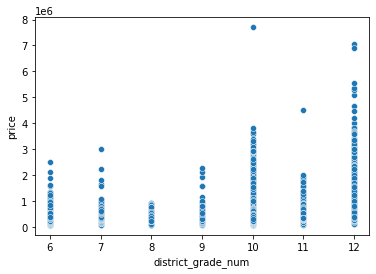

In [64]:
sns.scatterplot(x=df.district_grade_num, y=df.price)
# sns.scatterplot(x=df_districts_binned.district_grade_num_binned, y=df.price)

Visualization of school district grade geographical distrubtion. It looks like it could be a good proxy for binning zipcodes (hard to get meaningful coefficient values for a linear regression model without binning for 70 different zipcodes.

<AxesSubplot:xlabel='long', ylabel='lat'>

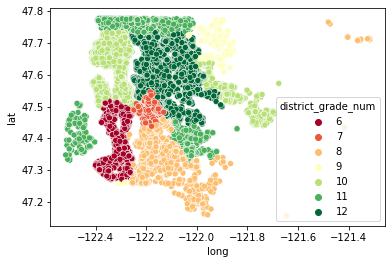

In [65]:
sns.scatterplot(x=df.long, y=df.lat, hue=df.district_grade_num, palette='RdYlGn')

In [66]:
# sns.scatterplot(x=df.long, y=df.lat, hue=df_districts_binned.district_grade_num_binned, palette='RdYlGn')

## Median Household Income GeoData


As mentioned before. there is a wealth of GeoData easily accesible online: [King County Open GIS center](https://gis-kingcounty.opendata.arcgis.com/).

Exploring this database for King County geographical data, I found another dataset that would be very interesting to add to the housing data I have so far: Median incomes for King County residents collected between the years 2012-2017. A detailed explanation of the dataset can be found here: [King County Median Income](https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::acs-median-household-income-in-the-past-12-months-in-inflation-adjusted-dollars-acs-b19013-medianhouseholdincome/about).

*Dataset title* =  ACS: Median Household Income In The Past 12 Months (In Inflation-Adjusted Dollars) / acs b19013 medianhouseholdincome.


![400 geographical income division](images/income_map.png)

Above is a screenshot of the webpage where I downloaded the shapefile from. This shapefile contains around 400 different polygons which contain information for median household income of King County residents based on continuous sampling from the years 2012 to 2017. 

I believe adding this data to my dataframe will prove to be very interesting. I will potentially have another feature that bins the houses geographicaly and will likely have a linear relationship with housing prices. In practice I can add a 'median income' feature to each property which indicates the median income of their associated neighborhood/area they were sampled from. 

Essentially, there are 398 income 'zones' based on survey that I can include in my dataset for King County Housing. 

The same steps were carried out using QGIS software as describe above in the Step By Step QGIS Guide for School District Data. The atribute of interest (median income of surrounding area) was added from the shapefile to each property that overlaped with their corresponding polygons. 


## Per Capita Income
An even more interesting variable I chanced upon is per capita income instead of household income. This will better reflect individual incomes of each geological tract (~400 geological divisions mentioned above). This data uses the same geological tract and survey methods to provide this data. Detailed information on metadata and collection can be found here:

[per_capita_income](https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::acs-per-capita-income-in-the-past-12-months-in-inflation-adjusted-dollars-acs-b19301-percapitaincome/about)

In [67]:
#import income data derived from QGIS software and Open GIS King County information
incomes_df = pd.read_csv('data/median_income.csv')

In [68]:
#initialize income series
incomes = incomes_df.E19013171.copy()

#rename for clarity
incomes.rename('median_household_income', inplace=True)

#add income series to dataframe
df = df.join(incomes)

In [69]:
#import QGIS processed data
percap_df = pd.read_csv('data/per_cap_income.csv')
percap_df.head()

field_1  E19301166
0        0    36991.0
1        1    37334.0
2        2    51943.0
3        3    64829.0
4        4    66934.0

In [70]:
#prepare series
percap_incomes = percap_df['E19301166'].copy()
#rename series for clarity
percap_incomes.rename('income_per_capita', inplace=True)
#join to intial dataframe
df = df.join(percap_incomes)

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


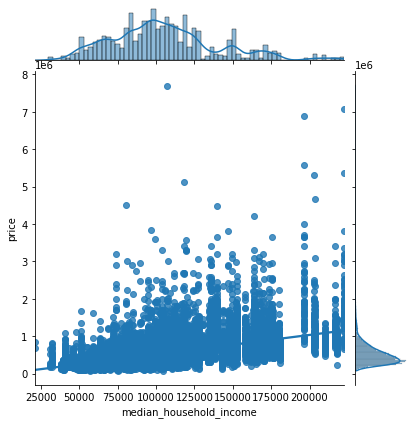

In [71]:
#inspect correlation
sns.jointplot('median_household_income','price', data=df, kind='reg');

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


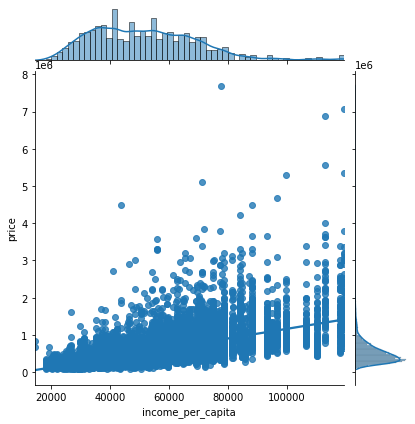

In [72]:
#inspect correlation
sns.jointplot('income_per_capita','price', data=df, kind='reg');

In [73]:
# df.loc[df['Median_Household_Income'] < 60000, 'Median_Household_Income'] = 1
# df.loc[(df['Median_Household_Income'] >= 60000) &
#        (df['Median_Household_Income'] < 75000), 'Median_Household_Income'] = 2

In [74]:
# df.loc[(df['Median_Household_Income'] >= 75000) &
#        (df['Median_Household_Income'] < 85000), 'Median_Household_Income'] = 3

# df.loc[(df['Median_Household_Income'] >= 85000) &
#        (df['Median_Household_Income'] < 95000), 'Median_Household_Income'] = 4

# df.loc[(df['Median_Household_Income'] >= 95000) &
#        (df['Median_Household_Income'] < 100000), 'Median_Household_Income'] = 5

# df.loc[(df['Median_Household_Income'] >= 100000) &
#        (df['Median_Household_Income'] < 110000), 'Median_Household_Income'] = 6

# df.loc[(df['Median_Household_Income'] >= 110000) &
#        (df['Median_Household_Income'] < 120000), 'Median_Household_Income'] = 7

# df.loc[(df['Median_Household_Income'] >= 120000) &
#        (df['Median_Household_Income'] < 130000), 'Median_Household_Income'] = 8

# df.loc[(df['Median_Household_Income'] >= 130000) &
#        (df['Median_Household_Income'] < 160000), 'Median_Household_Income'] = 9

# df.loc[df['Median_Household_Income'] >= 160000, 'Median_Household_Income'] = 10

In [75]:
ls images

King_County_Parks.png         income_map.png
add_polygon_attributes.png    park_vectors.pgw
distance_to_shore.png         park_vectors.png
district_result.png           pretty_districts_map.png
districts_popup.png           schools.png
export_csv.png                schools_and_vectors.png
health_disparity_graphic.png  seattle_map_shore.png


## Washington State Health Department Data


The Washington State Department of Health has created a very intersting tool for exploring the state of Washington: the Washington Environmental Health Disparities Map. 


Taken from the website linked below:

"The map is displayed on WTN's Information by Location (IBL) tool. The data on the map include 19 indicators and are divided into four themes:

Environmental Exposures (NOx-deisel emissions; ozone concentration; PM2.5 Concentration; populations near heavy traffic roadways; toxic release from facilities (RSEI model))

Environmental Effects (lead risk from housing; proximity to hazardous waste treatment, storage, and disposal facilities (TSDFs); proximity to National Priorities List sites (Superfund Sites); proximity to Risk Management Plan (RMP) facilties; wastewater discharge)

Sensitive Populations (death from cardiovascular disease; low birth weight)

Socioeconomic Factors (limited English; no high school diploma; poverty; race - people of color; transportation expense; unaffordable housing; unemployed)"

Please follow this link to explore the tool that was created by the health department and to review interesting information on how health is being tracked in the state. 

[health_disparities_index_information](https://www.doh.wa.gov/DataandStatisticalReports/WashingtonTrackingNetworkWTN/InformationbyLocation/WashingtonEnvironmentalHealthDisparitiesMap)


I am interested in including the aggregate information index provided by the health department: The Health Disparity Index. A helpful graphic on how this is calculated is provided below. 


![health_disparity_index_graphic](images/health_disparity_graphic.png)


Luckily, the GIS opendata website I have been using to access all of my geodata has this index coventialy stored as a shapefile. Using the same tactics as for income and school districts, I add the polygon attributes to the latlong points of my original data and imported the data back into my jupyter notebook.

In [76]:
#import data processed using QGIS software
health_disparity_df = pd.read_csv('data/health_disparity_index.csv')
health_disparity_df.head()

field_1  EHD_decile
0        0         8.0
1        1         7.0
2        2         3.0
3        3         6.0
4        4         1.0

In [77]:
#create series
health_disparities = health_disparity_df['EHD_decile'].copy()
#rename for clairty
health_disparities.rename('health_disparity_index', inplace=True)
#join to original dataframe
df = df.join(health_disparities)

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


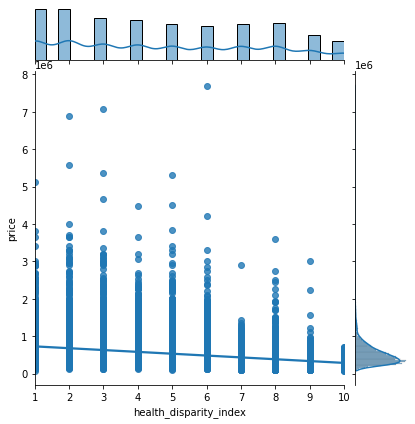

In [78]:
#inspect correlation
sns.jointplot('health_disparity_index','price', data=df, kind='reg');

## Common Points of Interest: Museums and Stadiums

The opendata GIS dashboard also included some easily accesable data in the form of a CSV file: common points of interest of King County. I wanted to add this as a way to manipulate geodata without using an QGIS software.

The data contains codes for 45 different domains which describe various different types of interesting locations. 

After reviewing the metadata provided by the King Count GIS center, I selected two domains of interest for my project: Museums and Stadiums. 


Feel free to explore the metadata yourself at the following link:
[points_of_interest](https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::wa-doh-environmental-health-disparities-index-calculated-for-king-county-wadohehdindex-area/about)


The table provided by the King COunty arcgis website also includes columns for geological coordinates and zipcodes. I decided to collect index values for zipcodes that contain either a museum or a stadium. After collecting the index values, I created boolean feature describing whether each property is in the same zipcode as a museum, and a seperate boolean feature describing whether each proiperty is in the same zipcode as a stadium.

In [79]:
POI_df = pd.read_csv('data/Common_Points_of_Interest_for_King_County____common_interest_point.csv')

In [80]:
POI_df.head()

X          Y  OBJECTID  FEATURE_ID     ESITE  CODE  \
0 -122.319489  47.408128         1        1355  382772.0   390   
1 -122.322633  47.705323         2        2729  269699.0   600   
2 -122.331770  47.594909         3        2772       0.0   240   
3 -122.056985  47.635016         4         660  376688.0   300   
4 -122.205575  47.772486         5         266       0.0   600   

                          NAME                    ABB_NAME  \
0           Des Moines Library              Des Moines Lib   
1   Northgate Community Center                Northgate CC   
2            CenturyLink Field           CenturyLink Field   
3  Sahalee Golf & Country Club  Sahalee GC &  Country Club   
4            William Penn Park           William Penn Park   

                      ADDRESS  ZIPCODE  
0            21620 11th Ave S    98198  
1            10510 5th Ave NE    98125  
2        800 Occidental Ave S    98104  
3            21200 NE 28th St    98074  
4  100th Ave NE & NE 200th St    98001

In [81]:
#grab list of zipcodes for various points of interest
museum_zipcodes = POI_df[POI_df.CODE == 480].ZIPCODE.values
stadium_zipcodes = POI_df[POI_df.CODE == 240].ZIPCODE.values
golf_zipcodes = POI_df[POI_df.CODE == 300].ZIPCODE.values

#find what listings are in selected zipcodes
#and grab indexes
museum_zip_indexes = df[df.zipcode.isin(museum_zipcodes)].index
stadium_zip_indexes = df[df.zipcode.isin(stadium_zipcodes)].index
golf_indexes = df[df.zipcode.isin(golf_zipcodes)].index

In [82]:
#create new boolean features for zipcodes
#that contain selected points of interest

df.loc[museum_zip_indexes, 'museum_zipcode'] = 1
df['museum_zipcode'].fillna(0, inplace=True)

df.loc[stadium_zip_indexes, 'stadium_zipcode'] = 1
df['stadium_zipcode'].fillna(0, inplace=True)

df.loc[golf_indexes, 'golf_zipcode'] = 1
df['golf_zipcode'].fillna(0, inplace=True)

display(df['museum_zipcode'].value_counts())
display(df['stadium_zipcode'].value_counts())
df['golf_zipcode'].value_counts()

0.0    17585
1.0     4012
Name: museum_zipcode, dtype: int64

0.0    18615
1.0     2982
Name: stadium_zipcode, dtype: int64

0.0    12644
1.0     8953
Name: golf_zipcode, dtype: int64

In [83]:
df.corr().price

id                        -0.016772
price                      1.000000
bedrooms                   0.315954
bathrooms                  0.525906
sqft_living                0.701917
sqft_lot                   0.089876
floors                     0.256804
waterfront                 0.276295
condition                  0.036056
grade                      0.667951
sqft_basement              0.321108
yr_built                   0.053953
yr_renovated               0.117855
zipcode                   -0.053402
lat                        0.306692
long                       0.022036
year_sold                  0.003727
month_sold                -0.009928
age_at_sale               -0.053890
recently_renovated         0.073734
has_basement               0.178264
living_per_bed             0.580109
field_1                    0.027436
shoreline_distance        -0.249941
new_waterfront             0.271747
district_grade_num         0.399726
median_household_income    0.504108
income_per_capita          0

## King County GeoData: Parks 

Being near a nice park is always a plus for a family. Here I have decided to import data from the King County GIS opendata website again.


![King County Parks](images/King_County_Parks.png)

As shown in the image above, I obtained a dataset of geological coordinates and their associated park names. The dataset contains over 2000 parks. I decided to filter the data first before exporting again as a CSV file to perform the built in vector analysis with the QGIS software.

In [84]:
#import data from the KingCounty GIS Open Data website
park_data = pd.read_csv('Park_Label_Points___park_label_point.csv')

In [85]:
#check column names
park_data.columns

Index(['X', 'Y', 'OBJECTID', 'KC_Fac_FID', 'KCParkFID', 'SiteName', 'SiteType',
       'Owner', 'OwnerType', 'Manager', 'ManageType', 'Maintd_By', 'MaintType',
       'Label_Type'],
      dtype='object')

I decided to create a list of popular parks in the King County region after a bit of exploration on google. The parks were chosen as a great mix for the whole family. Below I have linked the websites that I used to create this list:

[Project Nature Blog](https://www.projectnaturewa.com/explore-amazing-parks-throughout-king-county/)

[King County Parks and Rec](https://kingcounty.gov/services/parks-recreation/parks/parks-and-natural-lands.aspx)

[King County Parks](https://kingcountyparks.org/2016/04/07/5-king-county-parks-to-you-need-to-check-out-this-spring/)

[Parent Map](https://www.parentmap.com/article/the-wildest-biggest-best-parks-around-seattle)

In [86]:
park_list = ['Snoqualmie Point Park',
'Iron Horse State Park',
'Olallie State Park',
'Fisher Creek Park',
'Medina Beach Park',
'Duthie Hill Park',             
'Clark Lake Park',
'Luther Burbank Park',
'Cal Anderson Park',
'Marymoor Park',
'Washington Park Arboretum',
'Mercer Slough Nature Park',
'Warren G. Magnuson Park',            
'Saint Edward State Park',
'Lincoln Park',
'Kubota Gardens',
'Seward Park',
'Newcastle Beach Park',
'Georgetown Playfield',
'Dick Thurnau Memorial Park',
'Dockton Forest',
'Cougar Mountain Regional Wildland Park',
'Carkeek Park',
'Seahurst Park',
'Discovery Park',
'Volunteer Park']
len(park_list)           

26

In [87]:
#Filter data to only include hand picked parks
cool_parks = park_data[park_data.SiteName.isin(park_list)]

len(cool_parks.SiteName.unique())

26

In [88]:
#export data in order to perform
#vector analysis with QGIS software
cool_parks.to_csv('park_data.csv')


The image below was captured after using the QGIS software to create vectors from each property to the closest park on the list. I then added this data back to the initial dataframe in order to create a new boolean feature: Near Park. I decided to use 4 miles as the cutoff.

Therefore, the new feature will indicate whether the property is within 4 miles of one of these interesting parks.

![QGIS Park Vectors](images/park_vectors.png)

In [89]:
#import vector data from QGIS

parks_df = pd.read_csv('data/top_park_distance.csv')

top_parks = parks_df.park_distance1_HubDist

top_parks.rename('dist_to_park', inplace=True)

#filter data

near_park4 = top_parks[top_parks < 4]

#join data back
df = df.join(near_park4)

In [90]:
#This block of code replaces all distances within 4 miles 
#with a 1 and fills all other values with a zero.

df['near_park'] = df['dist_to_park'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)
df.near_park.fillna(0, inplace=True)
df.near_park.value_counts()

1.0    16143
0.0     5454
Name: near_park, dtype: int64

## Initial Model Creation

In [91]:
df.columns

Index(['id', 'date_sold', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'year_sold', 'month_sold', 'age_at_sale', 'recently_renovated',
       'has_basement', 'living_per_bed', 'field_1', 'shoreline_distance',
       'new_waterfront', 'district_grade_num', 'median_household_income',
       'income_per_capita', 'health_disparity_index', 'museum_zipcode',
       'stadium_zipcode', 'golf_zipcode', 'dist_to_park', 'near_park'],
      dtype='object')

In [92]:
df1 = df.drop(columns=['id', 'date_sold',
                       'waterfront', 'yr_built',
                       'yr_renovated', 'zipcode',
                       'lat', 'long', 'year_sold',
                       'living_per_bed', 'field_1',
                       'shoreline_distance', 'dist_to_park',
                      'sqft_basement'])

In [93]:
#drop row where no informationf or median household income
df1.drop(df1[df1.median_household_income.isna()].index, inplace=True)
df1.drop(df1[df1.health_disparity_index.isna()].index, inplace=True)

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21571 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21571 non-null  float64
 1   bedrooms                 21571 non-null  int64  
 2   bathrooms                21571 non-null  float64
 3   sqft_living              21571 non-null  int64  
 4   sqft_lot                 21571 non-null  int64  
 5   floors                   21571 non-null  float64
 6   condition                21571 non-null  int64  
 7   grade                    21571 non-null  int64  
 8   month_sold               21571 non-null  int64  
 9   age_at_sale              21571 non-null  int64  
 10  recently_renovated       21571 non-null  int64  
 11  has_basement             21571 non-null  int64  
 12  new_waterfront           21571 non-null  float64
 13  district_grade_num       21571 non-null  int64  
 14  median_household_incom

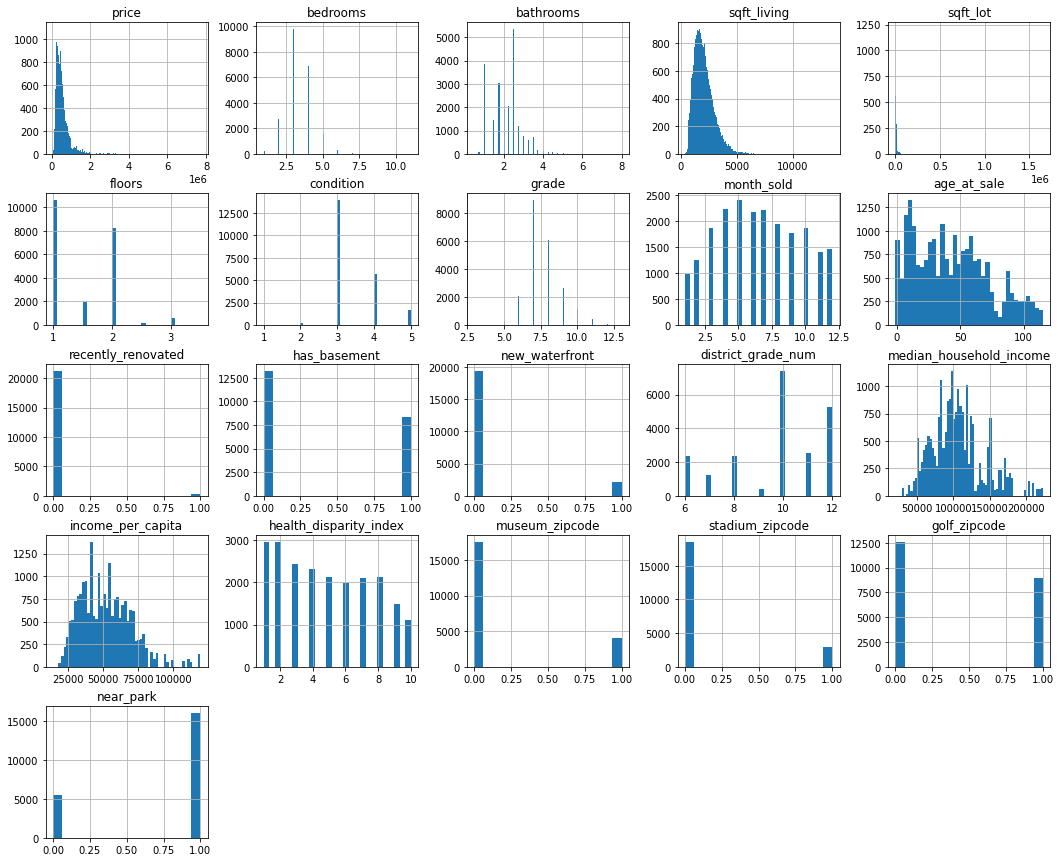

In [95]:
# create histogram for each column
df1.hist(figsize = (18, 15), bins = 'auto');

In [96]:
# function to plot boxplots against the dependent variable
def boxplot_cols(df, dv):
    '''Takes a dataframe and a dependent variable and prints box plots of
    each varible agains the dependent variable'''
    
    cols = df.columns
    
    #calculate number of rows assuming 3 plots per row
    rows = len(cols) // 3 + bool(len(cols) % 3)
    
    fig, axs = plt.subplots(rows, 3, figsize=(12,rows*3))
    
    # flatten the axs variable so the can be accessed sequetially
    axs = np.array(axs).flatten()

    for n, col in enumerate(cols):
        sns.boxplot(x=df[col], y=dv, ax=axs[n])
        plt.xlabel(col)
    
    # remove axis that are not in use
    for n in range(n+1,rows*3):
        axs[n].set_axis_off()
        
    plt.tight_layout()

In [97]:
# function to plot scatterplots against the dependent variable
def scatterplot_cols(df, dv):
    '''Takes a dataframe and a dependent variable and prints box plots of
    each varible agains the dependent variable'''
    
    cols = df.columns
    
    #calculate number of rows assuming 3 plots per row
    rows = len(cols) // 3 + bool(len(cols) % 3)
    
    fig, axs = plt.subplots(rows, 3, figsize=(12,rows*3))
    
    # flatten the axs variable so the can be accessed sequetially
    axs = np.array(axs).flatten()

    for n, col in enumerate(cols):
        sns.scatterplot(x=df[col], y=dv, ax=axs[n])
        plt.xlabel(col)
    
    # remove axis that are not in use
    for n in range(n+1,rows*3):
        axs[n].set_axis_off()
        
    plt.tight_layout()

In [98]:
categoricals = ['near_park', 'new_waterfront',
               'has_basement', 'recently_renovated',
               'floors', 'month_sold', 'museum_zipcode',
               'stadium_zipcode', 'golf_zipcode'] 

In [99]:
ordinals = ['bedrooms', 'bathrooms', 'grade',
           'condition', 'district_grade_num',
           'health_disparity_index']

In [100]:
continuous = ['sqft_living', 'sqft_lot',
             'age_at_sale', 'median_household_income', 
            'district_grade_num', 'condition',
            'grade', 'income_per_capita',
             'health_disparity_index', 
              'bedrooms', 'bathrooms']

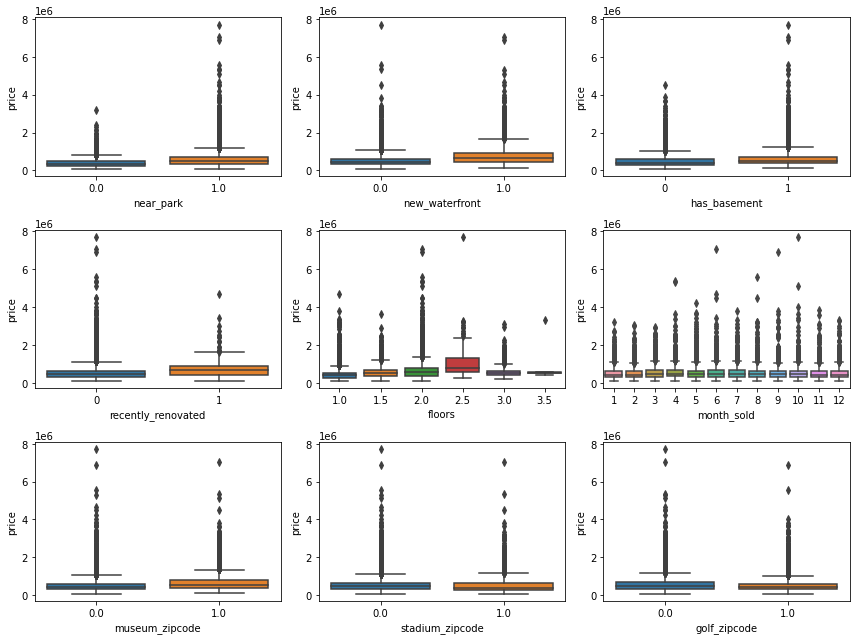

In [101]:
boxplot_cols(df1[categoricals], df1.price)

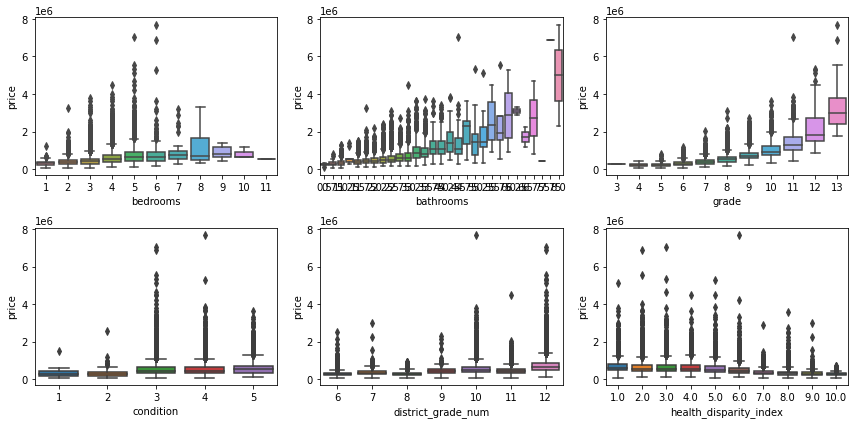

In [102]:
boxplot_cols(df1[ordinals], df1.price)

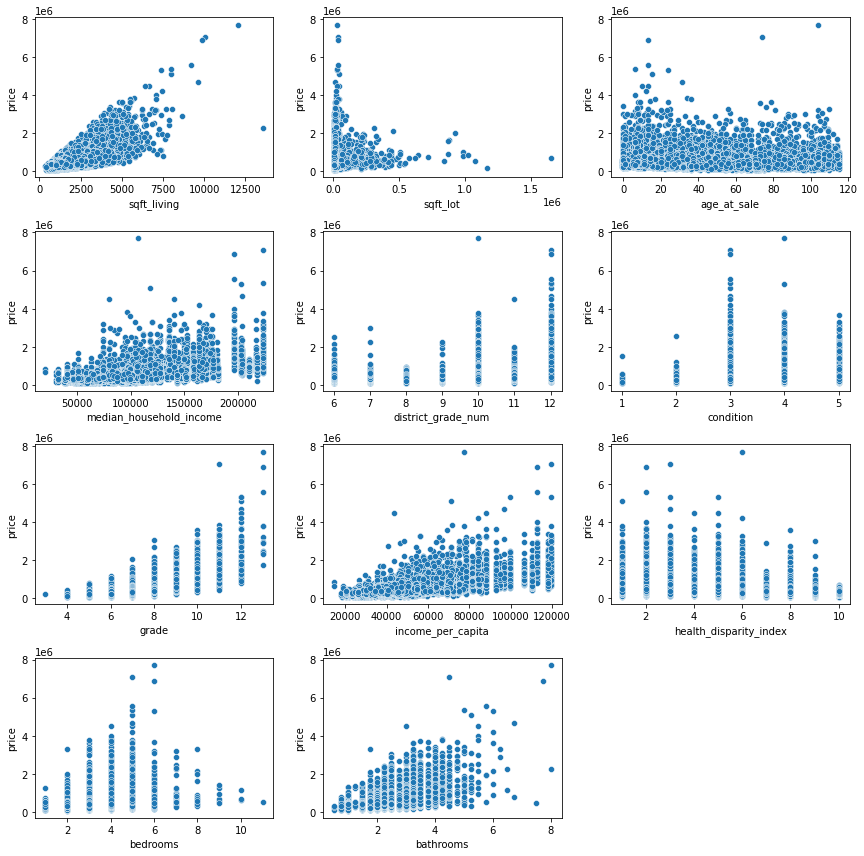

In [103]:
scatterplot_cols(df1[continuous], df1.price)

In [104]:
df1 = df1.drop(columns=['month_sold'])

In [105]:
X = df1.drop('price', axis=1)
y= df1.price

In [106]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 111)

In [107]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [108]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

# Fit the model on X_train_final and y_train
baseline_model.fit(X_train, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [109]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Score: ',baseline_model.score(X_train, y_train))
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('--------------------------------------------------')
print('Test Score: ', baseline_model.score(X_test, y_test))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Score:  0.7481549822065876
Train Root Mean Squarred Error: 180718.85405628665
--------------------------------------------------
Test Score:  0.7493168812105611
Test Root Mean Squarred Error: 187313.74959554558


In [110]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

final_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", final_scores["train_score"].mean())
print("Validation score:", final_scores["test_score"].mean())


Train score:      0.7467334712591497
Validation score: 0.752207416714754


In [111]:
from sklearn.metrics import mean_squared_error

# np.sqrt(mean_squared_error(y_test, final_model.predict(X_test_final)))

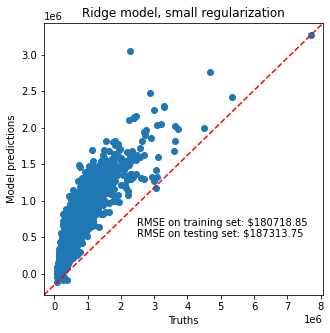

In [112]:
y_pred = baseline_model.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
string_score = f'RMSE on training set: ${RMSE:.2f}'
y_pred = baseline_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
string_score += f'\nRMSE on testing set: ${RMSE:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(2500000, 500000, string_score)
plt.title('Ridge model, small regularization')
plt.ylabel('Model predictions')
plt.xlabel('Truths');

## Filter Data

After creating a baseline model with no filtering, I decided to see how filtering the clean data before the train test split would affect the performance of the model. 

The problem being solved through the creation of this model is to serve new families or individuals moving to King County, Washington understand what factors affect the price of buying a home and by how much. I believe it is reasonable to filter the data to more realistic expectations for first time home buyers. 

Removing data is not always wise for regression models. The result will still be a fair model as long as it is clear that the data is filtered and it is clear what percent of original data has been removed has been removed.

Below I begain iteratively filtering the data based on three key metrics: The price, squarefoot living, and income per capita. For each metric, I determined the interal quartile region and removed outliers approrpriately. 

The iterative IQR filtering of these three metrics resulted in a loss of data of 6.66%. The model will still retain reasonable predicitive abilities for over 93% of the data.

After the iterative IQR, I decided to filter for only listings that have less than 8 bedrooms and less than 7 bathrooms in order to make the model easier to interpret. This cutoff also reflects more reasonable houses for the target audience to purchase. 

The total amount of data filtered was 6.67%. 

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an 

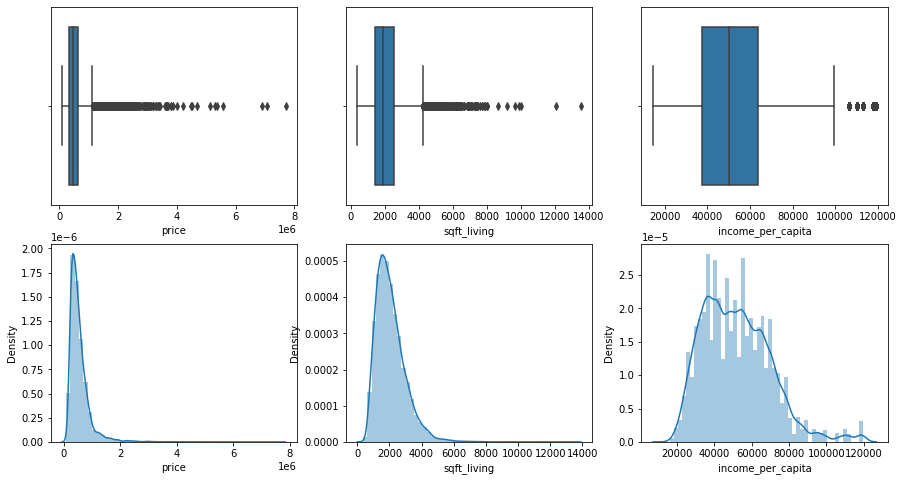

In [113]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.boxplot(df1['price'])
plt.subplot(2,3,2)
sns.boxplot(df1['sqft_living'])
plt.subplot(2,3,3)
sns.boxplot(df1['income_per_capita'])
plt.subplot(2,3,4)
sns.distplot(df['price'])
plt.subplot(2,3,5)
sns.distplot(df1['sqft_living'])
plt.subplot(2,3,6)
sns.distplot(df1['income_per_capita'])
plt.show();

In [114]:
price_Q1 = df['price'].quantile(0.25)
price_Q3 = df['price'].quantile(0.75)
iqr = price_Q3 - price_Q1

living_Q1 = df1['sqft_living'].quantile(0.25)
living_Q3 = df1['sqft_living'].quantile(0.75)
living_iqr = living_Q3 - living_Q1

income_Q1 = df1['income_per_capita'].quantile(0.25)
income_Q3 = df1['income_per_capita'].quantile(0.75)
income_iqr = income_Q3 - income_Q1

price_upper_limit = price_Q3 + (1.5 * iqr)
price_lower_limit = price_Q1 - (1.5 * iqr)

living_upper_limit = living_Q3 + (1.5 * living_iqr)
living_lower_limit = living_Q1 - (1.5 * living_iqr)

income_upper_limit = income_Q3 + (1.5 * income_iqr)
income_lower_limit = income_Q1 - (1.5 * income_iqr)

In [115]:
print(f'price upper limit: {price_upper_limit}')
print(f'price lower limit: {price_lower_limit}')
print(f'living upper limit: {living_upper_limit}')
print(f'living lower limit: {living_lower_limit}')
print(f'income upper limit: {income_upper_limit}')
print(f'income lower limit: {income_lower_limit}')

price upper limit: 1129500.0
price lower limit: -162500.0
living upper limit: 4236.0
living lower limit: -260.0
income upper limit: 103345.5
income lower limit: -2170.5


In [116]:
new_df = df1[(df1['price'] < price_upper_limit) &
             (df1['sqft_living'] < living_upper_limit) &
             (df1['income_per_capita'] < income_upper_limit)]
new_df.shape

(20134, 20)

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an 

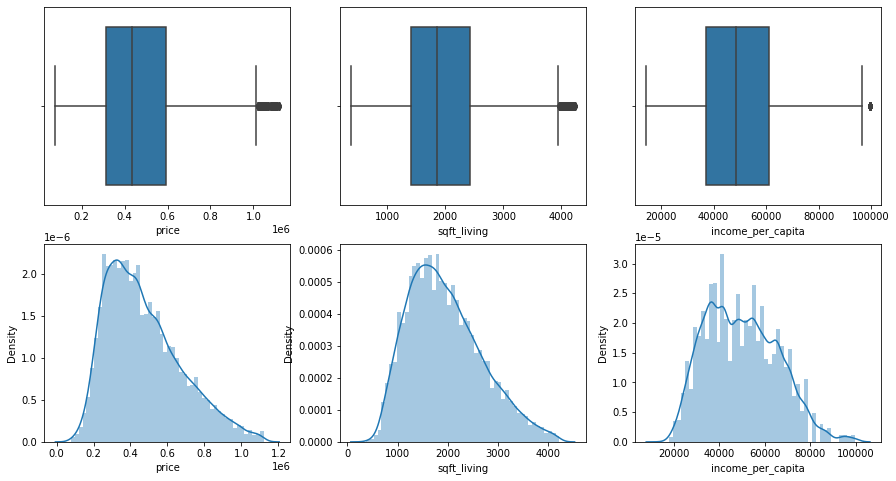

In [117]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.boxplot(new_df['price'])
plt.subplot(2,3,2)
sns.boxplot(new_df['sqft_living'])
plt.subplot(2,3,3)
sns.boxplot(new_df['income_per_capita'])
plt.subplot(2,3,4)
sns.distplot(new_df['price'])
plt.subplot(2,3,5)
sns.distplot(new_df['sqft_living'])
plt.subplot(2,3,6)
sns.distplot(new_df['income_per_capita'])
plt.show();

In [118]:
((len(new_df) - len(df1))/len(df1))*100

-6.661721756061379

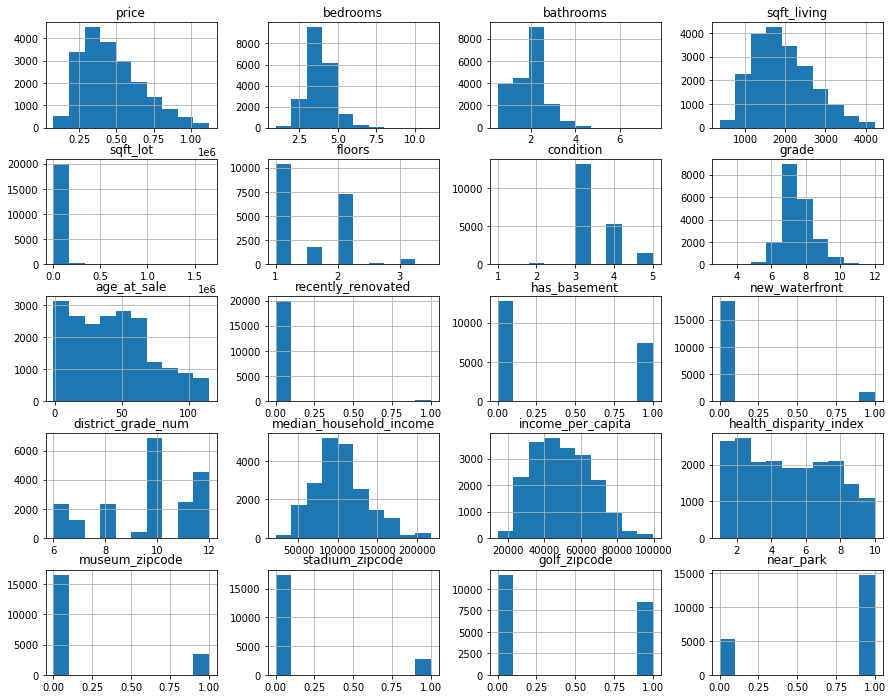

In [119]:
new_df.hist(figsize=(15,12));

In [120]:
new_df['multi_story'] = new_df['floors']

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
#convert all floors of value 1.5 to value 2

one_floor_index = new_df[new_df.floors <= 1].index
multi_story_index = new_df[new_df.floors > 1].index
new_df.loc[one_floor_index, 'multi_story'] = 0
new_df.loc[multi_story_index, 'multi_story'] = 1
new_df.multi_story.value_counts()

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0.0    10357
1.0     9777
Name: multi_story, dtype: int64

In [122]:
new_df.bedrooms.value_counts(dropna=False)

3     9521
4     6181
2     2719
5     1266
6      212
1      195
7       25
8        8
9        4
10       2
11       1
Name: bedrooms, dtype: int64

In [123]:
new_df.bathrooms.value_counts(dropna=False)

2.50    5157
1.00    3832
1.75    2991
2.25    1936
2.00    1898
1.50    1418
2.75    1086
3.00     649
3.50     504
3.25     383
3.75      74
0.75      70
4.00      58
4.50      36
4.25      17
1.25       7
5.00       6
0.50       4
4.75       3
5.25       3
7.50       1
5.75       1
Name: bathrooms, dtype: int64

In [124]:
#Choose cutoff values for home buying and
#round bathroom to nearest int
#for easier understanding of model

new_df = new_df[(new_df.bedrooms < 8) & (new_df.bathrooms < 6)].copy()

new_df.bathrooms = new_df.bathrooms.round(0).astype(int)
new_df.bathrooms.value_counts()

2    13398
1     3909
3     2110
4      686
5       11
0        4
6        1
Name: bathrooms, dtype: int64

In [125]:
((len(new_df) - len(df1)) / len(df1))*100

-6.731259561448241

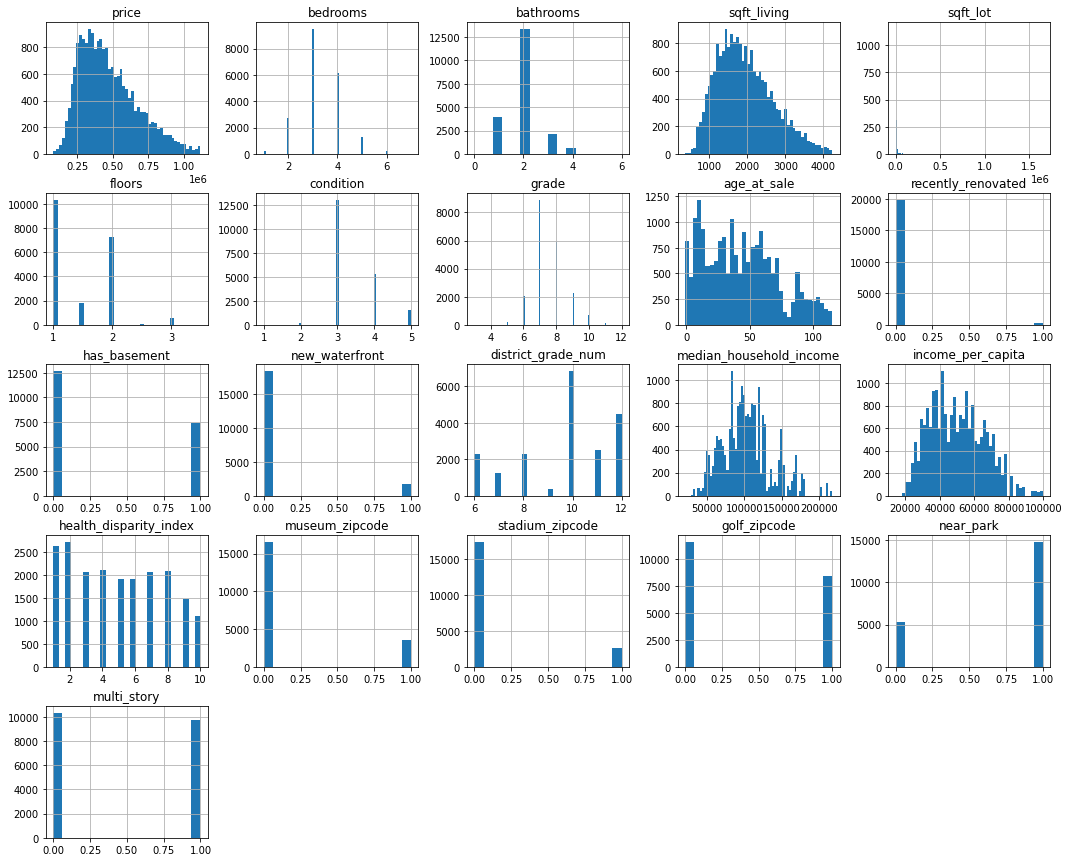

In [126]:
# create histogram for each column
new_df.hist(figsize = (18, 15), bins = 'auto');

In [127]:
categoricals = ['near_park', 'new_waterfront',
               'has_basement', 'recently_renovated',
               'floors', 'museum_zipcode',
               'stadium_zipcode', 'golf_zipcode',
               'multi_story'] 

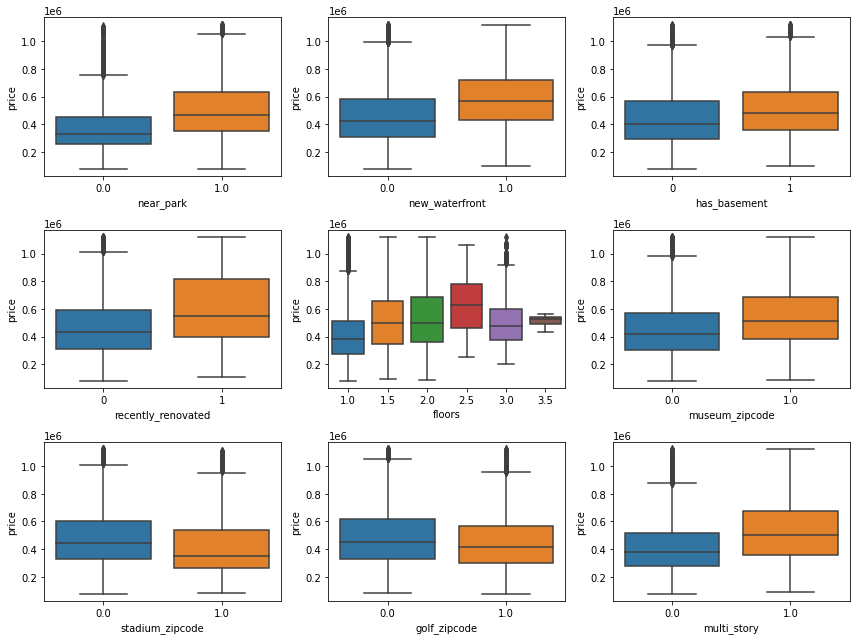

In [128]:
boxplot_cols(new_df[categoricals], new_df.price)

#after checking drop floors, month sold, and preWWII

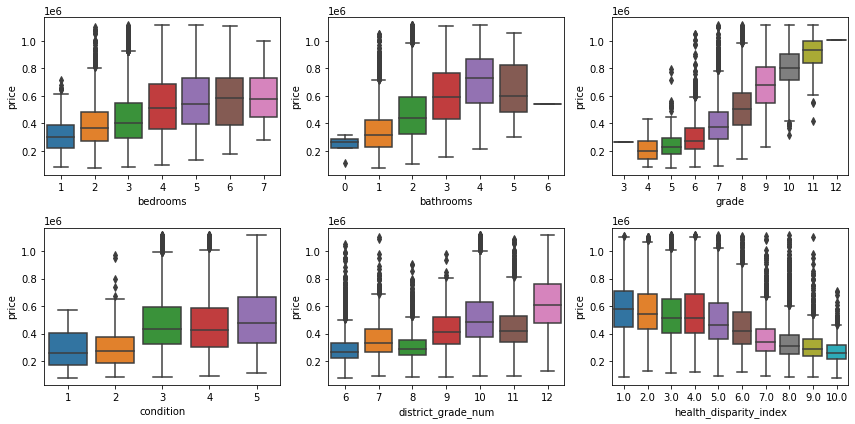

In [129]:
boxplot_cols(new_df[ordinals], new_df.price)

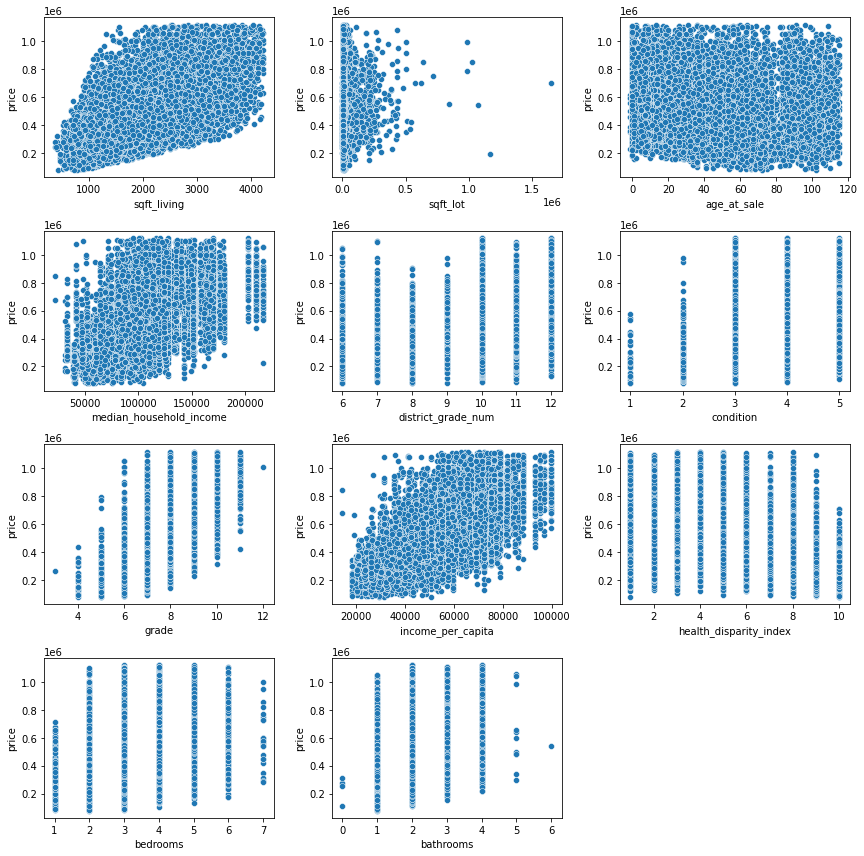

In [130]:
scatterplot_cols(new_df[continuous], new_df.price)

#decided to drop sqft_lot and age_at_sale

In [131]:
new_df.drop('floors', axis =1, inplace=True)

In [132]:
X = new_df.drop('price', axis=1)
y =  new_df.price

In [133]:
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 111)

In [155]:
model_1 = LinearRegression()

# Fit the model on X_train_final and y_train
model_1.fit(X_train, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = model_1.predict(X_train)
y_hat_test = model_1.predict(X_test)

In [156]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Score: ',model_1.score(X_train, y_train))
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('--------------------------------------------------')
print('Test Score: ', model_1.score(X_test, y_test))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Score:  0.783433940231501
Train Root Mean Squarred Error: 94464.49041090361
--------------------------------------------------
Test Score:  0.7858665765460655
Test Root Mean Squarred Error: 94571.5694258618


In [157]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

final_scores = cross_validate(
    estimator=model_1,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", final_scores["train_score"].mean())
print("Validation score:", final_scores["test_score"].mean())


Train score:      0.7835910860275689
Validation score: 0.7823185987408515


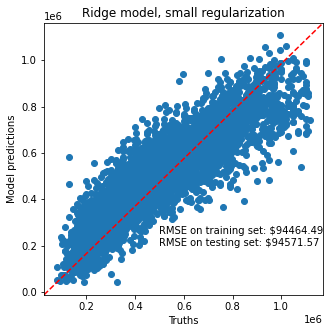

In [158]:
y_pred = model_1.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
string_score = f'RMSE on training set: ${RMSE:.2f}'

y_pred = model_1.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
string_score += f'\nRMSE on testing set: ${RMSE:.2f}'

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(500000, 200000, string_score)
plt.title('Ridge model, small regularization')
plt.ylabel('Model predictions')
plt.xlabel('Truths');

In [138]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2678.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:33:28   Log-Likelihood:            -1.8132e+05
No. Observations:               14083   AIC:                         3.627e+05
Df Residuals:                   14063   BIC:                         3.628e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6.399e+05    1.2e+04    -53.473      0.000   -6.63e+05   -6.16e+05
bedrooms                -5323.4515   1205.944     -4.414      0.000   -7687.263   -2959.640
bathrooms                1.234e+04   1677.556      7.359      0.000    9056.605    1.56e+04
sqft_living               107.3464      2.030     52.883      0.000     103.367     111.325
sqft_lot                    0.1738      0.020      8.602      0.000       0.134       0.213
condition                1.583e+04   1345.501     11.765      0.000    1.32e+04    1.85e+04
grade                    5.548e+04   1275.325     43.503      0.000     5.3e+04     5.8e+04
age_at_sale              1163.5997     38.292     30.388      0.000    1088.543    1238.657
recently_renovated       4.913e+04   7278.557      6.750      0.000    3.49e+04    6.34e+04
has_basement            -7219.1285   1940.314     -3.721      0.000    -1.1e+04   -3415.855
new_waterfront           2.675e+04   2967.886      9.014      0.000    2.09e+04    3.26e+04
district_grade_num       1.472e+04    589.286     24.976      0.000    1.36e+04    1.59e+04
median_household_income    -1.2003      0.049    -24.737      0.000      -1.295      -1.105
income_per_capita           6.5627      0.108     60.864      0.000       6.351       6.774
health_disparity_index  -1447.9528    484.217     -2.990      0.003   -2397.082    -498.824
museum_zipcode           1.746e+04   2217.287      7.873      0.000    1.31e+04    2.18e+04
stadium_zipcode          1908.5142   2506.727      0.761      0.446   -3005.004    6822.032
golf_zipcode            -1.354e+04   1700.388     -7.962      0.000   -1.69e+04   -1.02e+04
near_park                4.301e+04   2128.657     20.205      0.000    3.88e+04    4.72e+04
multi_story              8110.2634   1979.461      4.097      0.000    4230.258     1.2e+04
==============================================================================
Omnibus:                     1280.262   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3256.584
Skew:                           0.533   Prob(JB):                         0.00
Kurtosis:                       5.101   Cond. No.                     1.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
X_train2 = X_train.drop('stadium_zipcode', axis=1)

In [147]:
X_test2 = X_test.drop('stadium_zipcode', axis=1)

In [140]:
X_train_lm2 = sm.add_constant(X_train2)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2826.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:33:28   Log-Likelihood:            -1.8132e+05
No. Observations:               14083   AIC:                         3.627e+05
Df Residuals:                   14064   BIC:                         3.628e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6.402e+05    1.2e+04    -53.515      0.000   -6.64e+05   -6.17e+05
bedrooms                -5316.0595   1205.887     -4.408      0.000   -7679.759   -2952.360
bathrooms                1.237e+04   1677.228      7.375      0.000    9081.500    1.57e+04
sqft_living               107.2316      2.024     52.973      0.000     103.264     111.199
sqft_lot                    0.1739      0.020      8.607      0.000       0.134       0.213
condition                1.584e+04   1345.333     11.777      0.000    1.32e+04    1.85e+04
grade                    5.551e+04   1274.526     43.557      0.000     5.3e+04     5.8e+04
age_at_sale              1163.9882     38.288     30.401      0.000    1088.939    1239.037
recently_renovated       4.917e+04   7278.271      6.755      0.000    3.49e+04    6.34e+04
has_basement            -7229.2188   1940.240     -3.726      0.000    -1.1e+04   -3426.091
new_waterfront           2.668e+04   2966.474      8.995      0.000    2.09e+04    3.25e+04
district_grade_num       1.467e+04    585.339     25.056      0.000    1.35e+04    1.58e+04
median_household_income    -1.1990      0.048    -24.726      0.000      -1.294      -1.104
income_per_capita           6.5728      0.107     61.423      0.000       6.363       6.783
health_disparity_index  -1375.3497    474.727     -2.897      0.004   -2305.877    -444.822
museum_zipcode           1.736e+04   2213.418      7.842      0.000     1.3e+04    2.17e+04
golf_zipcode            -1.358e+04   1699.645     -7.988      0.000   -1.69e+04   -1.02e+04
near_park                4.278e+04   2106.948     20.304      0.000    3.86e+04    4.69e+04
multi_story              8208.5488   1975.217      4.156      0.000    4336.861    1.21e+04
==============================================================================
Omnibus:                     1282.924   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3263.295
Skew:                           0.534   Prob(JB):                         0.00
Kurtosis:                       5.103   Cond. No.                     1.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
model_2 = LinearRegression()

# Fit the model on X_train_final and y_train
model_2.fit(X_train2, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = model_2.predict(X_train2)
y_hat_test = model_2.predict(X_test2)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Score: ',model_2.score(X_train2, y_train))
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('--------------------------------------------------')
print('Test Score: ', model_2.score(X_test2, y_test))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Score:  0.7834250135699743
Train Root Mean Squarred Error: 94466.43726223329
--------------------------------------------------
Test Score:  0.7858497225047928
Test Root Mean Squarred Error: 94575.29112830876


In [167]:
94575.29112830876 - 94466.43726223329

108.85386607547116

In [150]:
X_test2

bedrooms  bathrooms  sqft_living  sqft_lot  condition  grade  \
9752          3          2         2060     38377          4      8   
2543          3          2         1440      4473          3      7   
12429         3          2         1480      6600          3      7   
14088         3          1          910      8700          4      6   
20191         4          2         2413      5701          3      8   
...         ...        ...          ...       ...        ...    ...   
4765          4          2         2220      6500          4      8   
5481          3          2         2050     40003          4      8   
20218         4          2         2650      5000          3      8   
16314         3          2         1435      8960          4      8   
4766          3          1         1270      7500          3      6   

       age_at_sale  recently_renovated  has_basement  new_waterfront  \
9752            36                   0             1             0.0   
2543            12                   0             0             0.0   
12429           71                   0             1             0.0   
14088           71                   0             0             0.0   
20191            1                   0             0             0.0   
...            ...                 ...           ...             ...   
4765            50                   0             0             1.0   
5481            37                   0             0             0.0   
20218            8                   0             0             0.0   
16314           46                   0             0             0.0   
4766            61                   0             0             0.0   

       district_grade_num  median_household_income  income_per_capita  \
9752                    6                  81054.0            32431.0   
2543                   12                 146596.0            66063.0   
12429                  10                 116836.0            65608.0   
14088                   6                  51006.0            24063.0   
20191                   8                  95313.0            48624.0   
...                   ...                      ...                ...   
4765                    6                 100077.0            55202.0   
5481                   12                 113651.0            46974.0   
20218                  10                 120189.0            59487.0   
16314                   8                  76978.0            38732.0   
4766                    6                  63692.0            26275.0   

       health_disparity_index  museum_zipcode  golf_zipcode  near_park  \
9752                      8.0             0.0           0.0        0.0   
2543                      1.0             0.0           0.0        1.0   
12429                     3.0             0.0           0.0        1.0   
14088                    10.0             0.0           1.0        0.0   
20191                     7.0             0.0           1.0        1.0   
...                       ...             ...           ...        ...   
4765                      3.0             0.0           0.0        1.0   
5481                      3.0             0.0           0.0        0.0   
20218                     3.0             0.0           0.0        1.0   
16314                     7.0             0.0           1.0        0.0   
4766                      9.0             0.0           0.0        0.0   

       multi_story  
9752           0.0  
2543           1.0  
12429          0.0  
14088          0.0  
20191          1.0  
...            ...  
4765           1.0  
5481           0.0  
20218          1.0  
16314          0.0  
4766           0.0  

[6036 rows x 18 columns]

In [151]:
X_train2

bedrooms  bathrooms  sqft_living  sqft_lot  condition  grade  \
2178          5          2         2020      5000          4      7   
1140          5          2         1680      3240          3      5   
6680          3          2         1640      4860          3      8   
4137          3          2         1990      5149          3      8   
13345         3          2         2590      4961          3      9   
...         ...        ...          ...       ...        ...    ...   
7981          2          1          770      6450          4      6   
4504          3          2         1420      7520          4      7   
5189          4          2         2670     11877          3      9   
10906         4          2         2170     14024          3      8   
12971         3          1          900      4770          3      6   

       age_at_sale  recently_renovated  has_basement  new_waterfront  \
2178            76                   0             0             0.0   
1140           109                   0             1             0.0   
6680            49                   0             1             0.0   
4137            11                   0             0             1.0   
13345           71                   1             0             0.0   
...            ...                 ...           ...             ...   
7981            66                   0             0             0.0   
4504            58                   0             0             0.0   
5189            18                   0             0             0.0   
10906           22                   0             0             0.0   
12971           45                   1             0             0.0   

       district_grade_num  median_household_income  income_per_capita  \
2178                   10                  79375.0            43788.0   
1140                   10                  43438.0            39166.0   
6680                   10                  63705.0            36189.0   
4137                   12                 176375.0            66560.0   
13345                  10                  99706.0            51003.0   
...                   ...                      ...                ...   
7981                   10                  68333.0            32837.0   
4504                   12                  98805.0            42446.0   
5189                   12                 170063.0            66934.0   
10906                   9                 142738.0            53236.0   
12971                   6                  83442.0            30088.0   

       health_disparity_index  museum_zipcode  golf_zipcode  near_park  \
2178                      5.0             1.0           0.0        1.0   
1140                      9.0             1.0           0.0        1.0   
6680                      6.0             0.0           1.0        1.0   
4137                      1.0             0.0           0.0        1.0   
13345                     5.0             0.0           1.0        1.0   
...                       ...             ...           ...        ...   
7981                      8.0             0.0           0.0        1.0   
4504                      4.0             0.0           0.0        1.0   
5189                      1.0             0.0           1.0        1.0   
10906                     1.0             0.0           0.0        0.0   
12971                     7.0             0.0           1.0        0.0   

       multi_story  
2178           1.0  
1140           0.0  
6680           0.0  
4137           1.0  
13345          1.0  
...            ...  
7981           0.0  
4504           0.0  
5189           1.0  
10906          1.0  
12971          0.0  

[14083 rows x 18 columns]

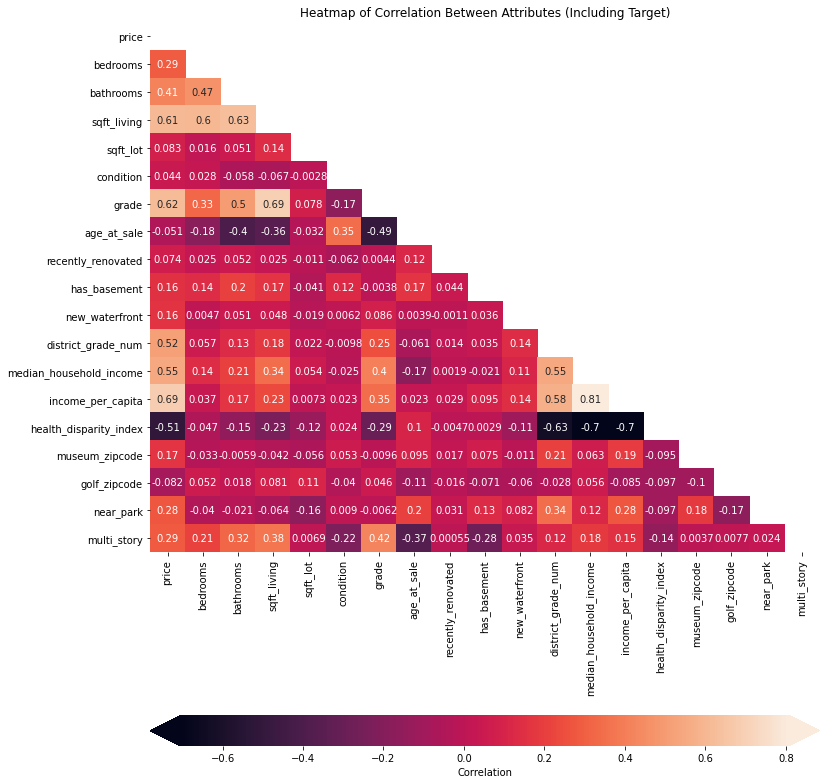

In [159]:
heatmap_data = pd.concat([y_train, X_train2], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [163]:
household_X_train = X_train2.drop('income_per_capita', axis=1)
household_X_test =  X_test2.drop('income_per_capita', axis=1)

indv_X_train = X_train2.drop('median_household_income', axis=1)
indv_X_test = X_test2.drop('median_household_income', axis=1)

In [162]:
household_model = LinearRegression()

# Fit the model on X_train_final and y_train
household_model.fit(household_X_train, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = household_model.predict(household_X_train)
y_hat_test = household_model.predict(household_X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Score: ',household_model.score(household_X_train, y_train))
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('--------------------------------------------------')
print('Test Score: ', household_model.score(household_X_test, y_test))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Score:  0.7253277271786404
Train Root Mean Squarred Error: 106385.0982975316
--------------------------------------------------
Test Score:  0.7369711979905862
Test Root Mean Squarred Error: 104814.17481692671


In [166]:
indv_model = LinearRegression()

# Fit the model on X_train_final and y_train
indv_model.fit(indv_X_train, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = indv_model.predict(indv_X_train)
y_hat_test = indv_model.predict(indv_X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Score: ',household_model.score(indv_X_train, y_train))
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('--------------------------------------------------')
print('Test Score: ', household_model.score(indv_X_test, y_test))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Score:  0.6950507444537208
Train Root Mean Squarred Error: 96497.89841734928
--------------------------------------------------
Test Score:  0.7083553996004013
Test Root Mean Squarred Error: 96321.38199708133


In [ ]:
# Checking for the VIF values of the variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor



# Creating a dataframe that will contain the names of all the feature variables and their VIFs

vif = pd.DataFrame()

vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

In [ ]:
# Checking for the VIF values of the variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor



# Creating a dataframe that will contain the names of all the feature variables and their VIFs

vif = pd.DataFrame()

vif['Features'] = X_train_scaled.columns

vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

In [ ]:
X_train2 = X_train.drop(columns=['stadium_zipcode'])

In [ ]:
X_train2_scaled = X_train_scaled.drop(columns=['bathrooms_5'])

In [ ]:
X_train_lm2 = sm.add_constant(X_train2)

lr_3 = sm.OLS(y_train, X_train_lm2).fit()

lr_3.summary()

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_train2_scaled.columns

vif['VIF'] = [variance_inflation_factor(X_train2_scaled.values, i) for i in range(X_train2_scaled.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

In [ ]:
X_train3 = X_train2.drop(columns=['bedrooms_2', 'bathrooms_2',
                                  'bathrooms_3', 'bedrooms_3',
                                 'bedrooms_5', 'bathrooms_5',
                                 'bedrooms_6', 'bedrooms_4',
                                 'bathrooms_4'])

In [ ]:
X_train_lm3 = sm.add_constant(X_train3)

lr_4 = sm.OLS(y_train, X_train_lm3).fit()

lr_4.summary()

In [ ]:
zxcxzczxczdxfcdzfzdf

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_train3_scaled.columns

vif['VIF'] = [variance_inflation_factor(X_train3_scaled.values, i) for i in range(X_train3_scaled.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

In [ ]:
X_interact = X_train3_scaled.copy()
X_interact['grade_sqft_living'] = X_train3_scaled['sqft_living'] * X_train3_scaled['grade']

In [ ]:
X_train_lm4_scaled = sm.add_constant(X_interact)

lr_4 = sm.OLS(y_train_log, X_train_lm4_scaled).fit()

lr_4.summary()

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_interact.columns

vif['VIF'] = [variance_inflation_factor(X_interact.values, i) for i in range(X_interact.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

In [ ]:
np.abs(X_interact.corr()).age_at_sale.sort_values(ascending=False)

In [ ]:
X_train4 = X_interact.copy()

In [ ]:
X_train4['age_over_grade'] = X_train4['age_at_sale']/X_train4['grade']

In [ ]:
X_train4.drop(columns=['age_at_sale'], inplace=True)

In [ ]:
X_train_lm5_scaled = sm.add_constant(X_train4)

lr_5 = sm.OLS(y_train_log, X_train_lm5_scaled).fit()

lr_5.summary()

In [ ]:
X_train5 = X_interact.copy()

In [ ]:
X_train5.columns

In [ ]:
X_train5.drop(columns=['bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6'], inplace=True)

In [ ]:
X_train_lm6_scaled = sm.add_constant(X_train5)

lr_5 = sm.OLS(y_train, X_train_lm6_scaled).fit()

lr_5.summary()

In [ ]:
y_train_price = lr_5.predict(X_train_lm6_scaled)

# Plot the histogram of the error terms

fig = plt.figure()

sns.distplot((y_train - y_train_price), bins = 20)

fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 

plt.xlabel('Errors', fontsize = 18);

In [ ]:
X_train_final = X_train5.copy()

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
df_test_scaled = df_test.copy()

scaler = StandardScaler()



# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables


df_test_scaled[continuous2] = scaler.fit_transform(df_test_scaled[continuous2])



df_test_scaled.head()

In [ ]:
X_test_scaled = df_test_scaled.copy()

In [ ]:
y_test_log = np.log(y_test)

In [ ]:
X_test_final = X_test_scaled.drop(columns=['bedrooms_2', 'bedrooms_3',
                       'bedrooms_4', 'bedrooms_5',
                     'bedrooms_6', 'bathrooms_5'])

In [ ]:
X_test_final['grade_sqft_living'] = X_test_final['sqft_living'] * X_test_final['grade']

In [ ]:
X_test_final

In [ ]:
X_train_final

In [ ]:
# final_model = LinearRegression()

# # Fit the model on X_train_final and y_train
# final_model.fit(X_train_final, y_train)

# # Score the model on X_test_final and y_test
# # (use the built-in .score method)

# print(final_model.score(X_train_final, y_train))
# final_model.score(X_test_final, y_test)

In [ ]:
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [ ]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [ ]:
print(pd.Series(final_model.coef_, index=X_train5.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

In [ ]:
coeff_df = pd.Series(final_model.coef_, index=X_train5.columns, name="Coefficients")

In [ ]:
continuous2

In [ ]:
coeff_s = coeff_df[continuous2]

In [ ]:
coeff_s.rename('coeff', inplace=True)

In [ ]:
coeff_means = df3[continuous2].mean()

In [ ]:
coeff_means.rename('mean', inplace=True)

In [ ]:
coeff_stds = df3[continuous2].std()

In [ ]:
coeff_stds.rename('std', inplace=True)

In [ ]:
coeff_df = coeff_s.to_frame().join(coeff_means)

In [ ]:
coeff_df = coeff_df.join(coeff_stds)

In [ ]:
coeff_df.columns

In [ ]:
coeff_df

In [ ]:
descaled = coeff_df['coeff']/coeff_df['std'] 

In [ ]:
descaled

In [ ]:
test_stuff = coeff_df['mean']*descaled

In [ ]:
test_stuff.sum()

In [ ]:
final_model.intercept_ - test_stuff.sum()

In [ ]:
-7.833e+05

In [ ]:
coeff_df2 = pd.Series(final_model.coef_, index=X_train5.columns, name="Coefficients")

In [ ]:
coeff_df2 = coeff_df2.drop(continuous2)

In [ ]:
coeff_df2

In [ ]:
pd.concat([coeff_df2, descaled])

In [ ]:
final_model.intercept_

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
sdfdsfdsfsfsfds

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively

np.random.seed(0)

df_train_filtered, df_test_filtered = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 111)

In [ ]:
xcvcxbvdcbdcbdfgdfgfdgdfgdf

In [ ]:
y_train_filtered = df_train_filtered.price
X_train_fltered = df_train_filtered.drop(columns='price')
X_train_filtered_scaled = df_train_filtered_scaled.drop(columns=['price'])


In [ ]:
sm.OLS(y_train_filtered, sm.add_constant(X_train_filtered_scaled)).fit().summary()

In [ ]:
X_train_filtered_scaled.drop(columns=['floors'], inplace=True)

In [ ]:
sm.OLS(y_train_filtered, sm.add_constant(X_train_filtered_scaled)).fit().summary()

In [ ]:
X_train_filtered_scaled.sqft_living.hist()

In [ ]:
X_train_filtered_scaled.price.hist()

In [ ]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),

    # Specifies that we should use the existing axes
    ax=ax,
    
    # Specifies that we want labels, not just colors
    annot=True,
    
    cmap = sns.diverging_palette(275, 150, l=55, as_cmap=True),
    # Customizes colorbar appearance
    
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance

# Generate a custom diverging colormap

#add title
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");


In [ ]:
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [ ]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=11)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator= third_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Previous Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,10), sharey=True)

categoricals = ['bathrooms', 'bedrooms']

for col, ax in zip(categoricals, axes.flatten()):
    (df2.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()


In [ ]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator= fourth_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Previous Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())

In [ ]:
X_train_fifth_model = X_train.drop(columns=['floors'])

In [ ]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator= fourth_model,
    X=X_train_fifth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()
print("Previous Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())

In [ ]:

# Fit the model on X_train_final and y_train
fifth_model.fit(X_train_fifth_model, y_train)


# Score the model on X_test_final and y_test
# (use the built-in .score method)
fifth_model.score(X_test, y_test)

In [ ]:
X_train_fifth_model

In [ ]:
# brand_new_homes = df2[df2.age_at_sale <=2].copy()
# below_median_age = df2[(df2.age_at_sale > 2) & (df2.age_at_sale < 42)].copy()
# median_age_and_above =  df2[(df2.age_at_sale >= 42) & (df2.age_at_sale < 100)].copy()
# antique_homes = df2[df2.age_at_sale >= 100].copy()

In [ ]:
# plt.figure(figsize=(12,7))

# regression_1 = LinearRegression()
# regression_2 = LinearRegression()
# regression_3 = LinearRegression()
# regression_4 = LinearRegression()

# area_1 = brand_new_homes['sqft_living'].values.reshape(-1, 1)
# area_2 = below_median_age['sqft_living'].values.reshape(-1, 1)
# area_3 = median_age_and_above['sqft_living'].values.reshape(-1, 1)
# area_4 =  antique_homes['sqft_living'].values.reshape(-1, 1)

# regression_1.fit(area_1, brand_new_homes['price'])
# regression_2.fit(area_2, below_median_age['price'])
# regression_3.fit(area_3, median_age_and_above['price'])
# regression_4.fit(area_4, antique_homes['price'])

# # Make predictions using the testing set
# pred_1 = regression_1.predict(area_1)
# pred_2 = regression_2.predict(area_2)
# pred_3 = regression_3.predict(area_3)
# pred_4 = regression_4.predict(area_4)


# # The coefficients
# print(regression_1.coef_)
# print(regression_2.coef_)
# print(regression_3.coef_)
# print(regression_4.coef_)

In [ ]:
# # Plot outputs
# plt.figure(figsize=(10,6))

# plt.scatter(area_1,  brand_new_homes['price'],  color='blue', alpha = 0.3, label = 'brand_new')
# plt.scatter(area_2,  below_median_age['price'],  color='red', alpha = 0.3, label = 'below_median')
# plt.scatter(area_3,  median_age_and_above['price'],  color='yellow', alpha = 0.3, label = 'median_and_above')
# plt.scatter(area_4,  antique_homes['price'],  color='green', alpha = 0.3, label = 'antique')

# plt.plot(area_1, pred_1,  color='blue', linewidth=2)
# plt.plot(area_2, pred_2,  color='red', linewidth=2)
# plt.plot(area_3, pred_3,  color='yellow', linewidth=2)
# plt.plot(area_4, pred_4,  color='green', linewidth=2)

# plt.ylabel('price')
# plt.xlabel('sqft_living')
# plt.legend();

In [ ]:
len(y_train)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
shape(y_test)

In [ ]:
# Run this cell without changes
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, final_model.predict(X_test_final)))

In [ ]:
sm.OLS(y_train, sm.add_constant(X_train_fifth_model)).fit().summary()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

In [ ]:
xcvfdsgdgdgfdgdgd

In [ ]:
df.drop(columns=['field_1', 'shoreline_distance', 'living_per_bed', 'waterfront'], inplace=True)

In [ ]:
df1 = df.drop(columns=['id'])

In [ ]:
df2 = df.drop(columns=['id'])

In [ ]:
df1 = df1.join(df_districts.district_grade_num).copy()

In [ ]:
df2 = df1.join(df_districts_binned.district_grade_num_binned).copy()

In [ ]:
df1.info()

In [ ]:
df1.columns

In [ ]:
df2.columns

In [ ]:
df2.corr()

In [ ]:
df1.info()

In [ ]:
season_figure = plt.figure(figsize=(15,8))

# Add a subplot to the figure - a new axes
axs = season_figure.add_subplot(111)

sns.barplot(x='month_sold', y='price', data=df_95_percentile, 
            palette='hls', ax=axs)



# num_words = list(range(0,12))
# word_months = ['January', 'February', 'March', 'April',
#               'May', 'June', 'July', 'August', 'September',
#               'October', 'November', 'December']

# plt.xticks(num_words, word_months, rotation=30);

# sns.lineplot(x=num_words, y=monthly_ROI_medians, marker='o', color='orange', label='ROI median values');



# plt.title('Seasonal Returns of High Budget Films', fontsize=18, pad=30)
# plt.xlabel('Month', fontsize=16, labelpad=16)
# plt.ylabel('ROI(%)', fontsize=16, labelpad=16)


# plt.legend();

# plt.savefig("./images/high_seasons.png", dpi=150)
plt.show();

In [ ]:
test1 = dftest2[dftest2.dist_to_park < 2]
test2 =  dftest2[dftest2.dist_to_park < 3]

In [ ]:
bed_bath = df95.bedrooms/df95.bathrooms

In [ ]:
df95[bed_bath > 2].describe()

In [ ]:
df_top_percent = df[df.price > df.price.quantile(q=0.99)].copy()

In [ ]:
sns.distplot(df_95_percentile.price)

In [ ]:
dist_figure = plt.figure(figsize=(15,10))

# Add a subplot to the figure - a new axes
axd = dist_figure.add_subplot(111)

sns.distplot(df_top_percent.price, kde=False, ax=axd, label='top_one_percent')
sns.distplot(df_99_percentile.price, kde=False, ax=axd, label='99th percentile')

In [ ]:
df_top_percent.sort_values(['price'], ascending=False).head()

In [ ]:
df_mansions = df[df.sqft_living > 5000]

In [ ]:
df_houses = df[df.sqft_living < 5000]

In [ ]:
dist_figure = plt.figure(figsize=(15,10))

# Add a subplot to the figure - a new axes
axd = dist_figure.add_subplot(111)

sns.distplot(df_houses.price, kde=False, ax=axd, label='Houses')
sns.distplot(df_mansions.price, kde=False, ax=axd, label='Mansions')


In [ ]:
sns.distplot(df_houses.price)

In [ ]:
df_99per_houses = df_houses[df_houses.price < df_houses.price.quantile(q=0.99)].copy()
df_top_houses = df_houses[df_houses.price > df_houses.price.quantile(q=0.99)].copy()
df99per_mansions = df_mansions[df_mansions.price < df_mansions.price.quantile(q=0.99)].copy()
df_top_mansions = df_mansions[df_mansions.price > df_mansions.price.quantile(q=0.99)].copy()

In [ ]:
dist_figure = plt.figure(figsize=(15,10))

# Add a subplot to the figure - a new axes
axd = dist_figure.add_subplot(111)

sns.distplot(df_99per_houses.price, kde=False, ax=axd, label='Houses')
sns.distplot(df_top_houses.price, kde=False, ax=axd, label='Mansions')

In [ ]:
dist_figure = plt.figure(figsize=(15,10))

# Add a subplot to the figure - a new axes
axd = dist_figure.add_subplot(111)

sns.distplot(df99per_mansions.price, kde=False, ax=axd, label='Houses')
sns.distplot(df_top_mansions.price, kde=False, ax=axd, label='Mansions')

#### Flipped Houses

There are 177 pairs of records that do not have a unique value for 'id'. Upon further investigation, it seems that they are likely to be houses that were sold on multiples dates. 

Not much difference in percent of houses sold twice between houses that were rennovated and houses that were not. 

About 3.5% of the dataset contains houses that were renovated.

In [ ]:
print(len(df[df.duplicated('id')]))
test_df = df[df.duplicated('id', keep=False)]

In [ ]:
#dataset already ordered by date. Can split
#the data table of houses that were sold twice
#in order to see house flip price

a = test_df.drop_duplicates(subset=['id'], keep='first').copy()
b = test_df.drop_duplicates(subset=['id'], keep='last').copy()

In [ ]:
a.reset_index(drop='Index', inplace=True)
b.reset_index(drop='Index', inplace=True)

In [ ]:
days_to_flip = b - a

In [ ]:
days_to_flip.date_sold.describe()

In [ ]:
b.price.median() - a.price.median()

Below I created a visualization for the 177 recorded houses that were bought and sold within the timeframe of the years 2014-2015. The minimum amount of time to flip one of these 177 houses was 61 days. The max was 315 days. The median value of days for flipping these houses was 177 days. 

The difference in median price for the houses before and after flipping the house was roughly $165k. Looking at the distribution, it appears that flipping Seattle houses in under a year is profitable. Keep in mind that the error involved in our price variable means we have to take any expected returns with a grain of salt. 

In [ ]:
flip_figure = plt.figure(figsize=(12,8))

# Add a subplot to the figure - a new axes
axd = flip_figure.add_subplot(111)

sns.distplot(a.price, kde=False, ax=axd, label='Price Paid')
sns.distplot(b.price, kde=False, ax=axd, label='Price Sold')
plt.title('Seattle House Flipping Prices for 2014-2015')


plt.axvline(x=a.price.median(), color='r', linestyle='--', label='Median Price Paid')
plt.axvline(x=b.price.median(), color='g', linestyle='-', label='Median Price Sold')






plt.legend()
plt.show();